# Problem Statements 
1) When we go to bank to take a loan, that might be of anytype like Home, Personal, Education or Car loan, 
Bank do some background check against our credit history,
but sometime some people are applying fist time for loan, in that case its difficult for bank to decide financial capability of
applicant to repay the loan. 
2) So in such case bank need some data or variable on that basis bank can decide to accept application for loan or Reject it
& 
3) Basically There are two type of people 
i) Who like to repay the loan
ii)Those with difficulty paying installments, 

If bank give loan to first type then its be good business but if bank give loan to second type then it might be loss for bank. 
so 
This case study aim to find patterns or indicators or variable that help us to find applicant which tend to be defaulter, 

i.e "Driving force for defaulters we have to find" so bank use this for risk analysis.

## Lets import required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

## Lets read data 

In [3]:
master_df = pd.read_csv('application_data.csv')
master_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
master_df.shape

(307511, 122)

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
master_df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
master_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

# lets start with data cleaning 

In [8]:
master_df.isnull().sum()/master_df.shape[0]*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### lets drop some column with missing value more than 40%

In [9]:
master_df.drop(master_df.iloc[:,44:91], inplace=True, axis=1)

In [10]:
master_df.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [11]:
master_df.isnull().sum()/master_df.shape[0]*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [12]:
master_df.shape

(307511, 73)

### FLAG_DOCUMENT_2 - 14 this column are not give any significant information so we can drop it,
as bank only sanctioned loan if all required documents available, so this value does not make any sense in finding defaulter.

In [13]:
master_df.drop(master_df.iloc[:, 47:67 ], inplace=True, axis=1)

In [14]:
master_df.shape

(307511, 53)

In [15]:
master_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

## There are some column where % of missing value >= 13%, lets impute that values

In [16]:
master_df['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

In [17]:
master_df.value_counts('AMT_REQ_CREDIT_BUREAU_HOUR')/master_df.shape[0]*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    85.969608
1.0     0.507299
2.0     0.018211
3.0     0.002927
4.0     0.000325
dtype: float64

In [18]:
master_df.value_counts('AMT_REQ_CREDIT_BUREAU_DAY')/master_df.shape[0]*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    86.014159
1.0     0.420148
2.0     0.034470
3.0     0.014634
4.0     0.008455
5.0     0.002927
6.0     0.002602
9.0     0.000650
8.0     0.000325
dtype: float64

In [19]:
master_df.value_counts('AMT_REQ_CREDIT_BUREAU_WEEK')/master_df.shape[0]*100

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    83.722534
1.0     2.669173
2.0     0.064713
3.0     0.018861
4.0     0.011057
6.0     0.006504
5.0     0.003252
8.0     0.001626
7.0     0.000650
dtype: float64

In [20]:
master_df.value_counts('AMT_REQ_CREDIT_BUREAU_MON')/master_df.shape[0]*100

AMT_REQ_CREDIT_BUREAU_MON
0.0     72.268309
1.0     10.779127
2.0      1.751482
3.0      0.647457
4.0      0.349906
5.0      0.195765
6.0      0.111541
7.0      0.096907
9.0      0.066989
8.0      0.060160
10.0     0.042925
11.0     0.038698
12.0     0.025040
13.0     0.023414
14.0     0.013008
15.0     0.011382
16.0     0.007479
17.0     0.004553
18.0     0.001951
19.0     0.000976
22.0     0.000325
23.0     0.000325
24.0     0.000325
27.0     0.000325
dtype: float64

In [21]:
master_df.value_counts('AMT_REQ_CREDIT_BUREAU_QRT')/master_df.shape[0]*100

AMT_REQ_CREDIT_BUREAU_QRT
0.0      70.051803
1.0      11.011639
2.0       4.686662
3.0       0.558354
4.0       0.154791
5.0       0.020812
6.0       0.009105
7.0       0.002276
8.0       0.002276
19.0      0.000325
261.0     0.000325
dtype: float64

### In above column there is outlier as value 261 is far away than other values.

## Imputing 13% missing value in each column with "0", following is my thought process behind it 

In [22]:
master_df.value_counts('AMT_REQ_CREDIT_BUREAU_YEAR')/master_df.shape[0]*100

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     23.349083
1.0     20.618775
2.0     16.322018
3.0     10.935544
4.0      6.736019
5.0      3.919209
6.0      2.265610
7.0      1.258166
8.0      0.691683
9.0      0.356410
11.0     0.010081
12.0     0.009756
10.0     0.007154
13.0     0.006179
14.0     0.003252
17.0     0.002276
15.0     0.001951
18.0     0.001301
19.0     0.001301
16.0     0.000976
20.0     0.000325
21.0     0.000325
22.0     0.000325
23.0     0.000325
25.0     0.000325
dtype: float64

## still we have some column with missing value, lets take look each one of them

In [23]:
master_df['AMT_ANNUITY'].head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [24]:
master_df[master_df['AMT_ANNUITY'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

In [25]:
master_df = master_df[~master_df['AMT_ANNUITY'].isnull()]

In [26]:
master_df['AMT_ANNUITY'].isnull().sum()

0

In [27]:
master_df['AMT_GOODS_PRICE'].head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [28]:
master_df['AMT_GOODS_PRICE'].value_counts()

450000.0     26019
225000.0     25281
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4552
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2703
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1921
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

In [29]:
master_df['AMT_GOODS_PRICE'].median()

450000.0

#### why imputing values with median ?

### Filling NANs with the median

In [30]:
master_df['AMT_GOODS_PRICE']=master_df['AMT_GOODS_PRICE'].fillna(master_df['AMT_GOODS_PRICE'].median())

In [31]:
master_df['AMT_GOODS_PRICE'].isnull().sum()

0

In [32]:
master_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248515
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [33]:
master_df['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

### Filling NANs with this value

In [34]:
master_df['NAME_TYPE_SUITE']= master_df['NAME_TYPE_SUITE'].fillna(master_df['NAME_TYPE_SUITE'].mode()[0])

In [35]:
master_df['NAME_TYPE_SUITE'].isnull().sum()

0

In [36]:
master_df['OCCUPATION_TYPE'].value_counts() 

Laborers                 55184
Sales staff              32101
Core staff               27569
Managers                 21370
Drivers                  18602
High skill tech staff    11379
Accountants               9812
Medicine staff            8536
Security staff            6720
Cooking staff             5945
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [37]:
master_df['OCCUPATION_TYPE'] = master_df['OCCUPATION_TYPE'].fillna("Unknown")

In [38]:
master_df['OCCUPATION_TYPE'].isnull().sum()

0

In [39]:
master_df['OCCUPATION_TYPE'].value_counts() 

Unknown                  96391
Laborers                 55184
Sales staff              32101
Core staff               27569
Managers                 21370
Drivers                  18602
High skill tech staff    11379
Accountants               9812
Medicine staff            8536
Security staff            6720
Cooking staff             5945
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [40]:
master_df['CNT_FAM_MEMBERS'].value_counts()

2.0     158348
1.0      67844
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [41]:
master_df['CNT_FAM_MEMBERS'].mode()[0]

2.0

In [42]:
master_df['CNT_FAM_MEMBERS'] = master_df['CNT_FAM_MEMBERS'].fillna(master_df['CNT_FAM_MEMBERS'].mode()[0])

In [43]:
master_df['CNT_FAM_MEMBERS'].isnull().sum()

0

In [44]:
master_df = master_df[~master_df['DAYS_LAST_PHONE_CHANGE'].isnull()] 

In [45]:
master_df['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [46]:
master_df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

## lets do sanity check 

In [47]:
master_df['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [48]:
master_df['DAYS_BIRTH'] =master_df['DAYS_BIRTH'].abs()

In [49]:
master_df['DAYS_BIRTH'].head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

In [50]:
master_df['AGE'] = master_df['DAYS_BIRTH']/365

In [51]:
master_df['AGE'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: AGE, dtype: float64

In [52]:
master_df['AGE'] = round(master_df['AGE'])

In [53]:
master_df['AGE'].head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: AGE, dtype: float64

In [54]:
master_df['DAYS_EMPLOYED'].head()

0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64

In [55]:
master_df['YEAR_EMPLOYED'] = round(master_df['DAYS_EMPLOYED'].abs()/365)
master_df['YEAR_EMPLOYED'].head()

0    2.0
1    3.0
2    1.0
3    8.0
4    8.0
Name: YEAR_EMPLOYED, dtype: float64

In [56]:
master_df["DAYS_REGISTRATION"].head()

0   -3648.0
1   -1186.0
2   -4260.0
3   -9833.0
4   -4311.0
Name: DAYS_REGISTRATION, dtype: float64

In [57]:
master_df['YEAR_REGISTRATION'] = round(master_df['DAYS_REGISTRATION'].abs()/365)
master_df['YEAR_REGISTRATION'].head()

0    10.0
1     3.0
2    12.0
3    27.0
4    12.0
Name: YEAR_REGISTRATION, dtype: float64

In [58]:
master_df["DAYS_ID_PUBLISH"].head()

0   -2120
1    -291
2   -2531
3   -2437
4   -3458
Name: DAYS_ID_PUBLISH, dtype: int64

In [59]:
master_df['YEAR_ID_PUBLISH'] = round(master_df['DAYS_ID_PUBLISH'].abs()/365)
master_df['YEAR_ID_PUBLISH'].head()

0    6.0
1    1.0
2    7.0
3    7.0
4    9.0
Name: YEAR_ID_PUBLISH, dtype: float64

In [60]:
master_df['DAYS_LAST_PHONE_CHANGE'].head()

0   -1134.0
1    -828.0
2    -815.0
3    -617.0
4   -1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [61]:
master_df['YEAR_LAST_PHONE_CHANGE'] = round(master_df['DAYS_LAST_PHONE_CHANGE'].abs()/365)
master_df['YEAR_LAST_PHONE_CHANGE'].head()

0    3.0
1    2.0
2    2.0
3    2.0
4    3.0
Name: YEAR_LAST_PHONE_CHANGE, dtype: float64

#### now we can drop that columns where data was in days. 

In [62]:
master_df.drop(['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], axis=1, inplace=True)

In [63]:
master_df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT     

### Lets check that contact information makes impact on Target or not ?

In [64]:
contact_info =master_df[ ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET' ]]

<AxesSubplot:>

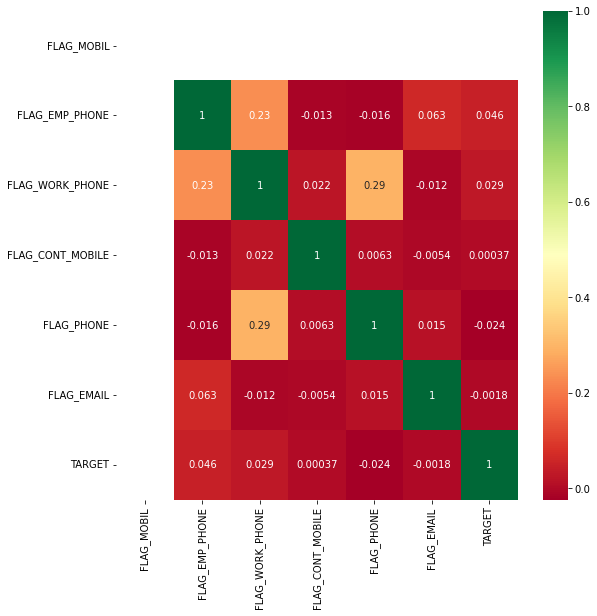

In [65]:
fig= plt.figure(figsize=(9, 9))
contact_corr =contact_info.corr()
sns.heatmap(contact_corr,
           xticklabels=contact_corr.columns,
           yticklabels=contact_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [66]:
master_df.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'], inplace=True, axis=1)

In [67]:
master_df.shape

(307498, 47)

## Lets Segregate the columns

In [68]:
for i in master_df.columns:
    if master_df[i].nunique()>67:
        
        print(i,master_df[i].nunique(),"Continuous")# no. of unique values
    
    else:
        print(i,master_df[i].nunique(),"Categorical")# no. of unique values

SK_ID_CURR 307498 Continous
TARGET 2 Categorical
NAME_CONTRACT_TYPE 2 Categorical
CODE_GENDER 3 Categorical
FLAG_OWN_CAR 2 Categorical
FLAG_OWN_REALTY 2 Categorical
CNT_CHILDREN 15 Categorical
AMT_INCOME_TOTAL 2548 Continous
AMT_CREDIT 5603 Continous
AMT_ANNUITY 13672 Continous
AMT_GOODS_PRICE 1002 Continous
NAME_TYPE_SUITE 7 Categorical
NAME_INCOME_TYPE 8 Categorical
NAME_EDUCATION_TYPE 5 Categorical
NAME_FAMILY_STATUS 6 Categorical
NAME_HOUSING_TYPE 6 Categorical
REGION_POPULATION_RELATIVE 81 Continous
OCCUPATION_TYPE 19 Categorical
CNT_FAM_MEMBERS 17 Categorical
REGION_RATING_CLIENT 3 Categorical
REGION_RATING_CLIENT_W_CITY 3 Categorical
WEEKDAY_APPR_PROCESS_START 7 Categorical
HOUR_APPR_PROCESS_START 24 Categorical
REG_REGION_NOT_LIVE_REGION 2 Categorical
REG_REGION_NOT_WORK_REGION 2 Categorical
LIVE_REGION_NOT_WORK_REGION 2 Categorical
REG_CITY_NOT_LIVE_CITY 2 Categorical
REG_CITY_NOT_WORK_CITY 2 Categorical
LIVE_CITY_NOT_WORK_CITY 2 Categorical
ORGANIZATION_TYPE 58 Categorical
EX

In [69]:
continous_data = ['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
continous_data

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

In [70]:
set1 = set(continous_data)
set1

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'REGION_POPULATION_RELATIVE',
 'SK_ID_CURR'}

In [71]:
columns = master_df.columns
columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_R

In [72]:
set2 = set(columns)
set2

{'AGE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'HOUR_APPR_PROCESS_START',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'SK_ID_CURR',
 'TARGET',
 'WE

In [73]:
Categorical_data =set2-set1
Categorical_data

{'AGE',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'HOUR_APPR_PROCESS_START',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'TARGET',
 'WEEKDAY_APPR_PROCESS_START',
 'YEAR_EMPLOYED',
 'YEAR_ID_PUBLISH',
 'YEAR_LAST_PHONE_CHANGE',
 'YEAR_REGISTRATION'}

# lets check for outliers

SK_ID_CURR


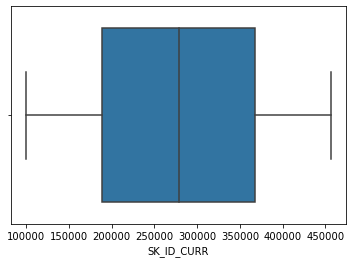

AMT_INCOME_TOTAL


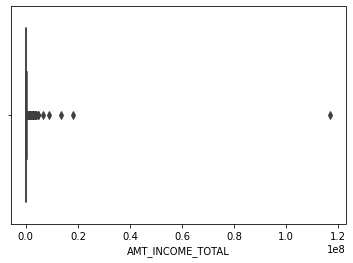

AMT_CREDIT


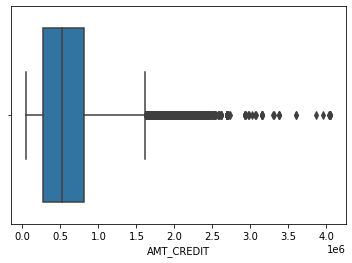

AMT_ANNUITY


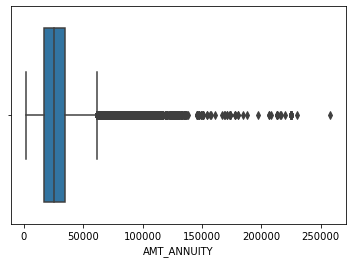

AMT_GOODS_PRICE


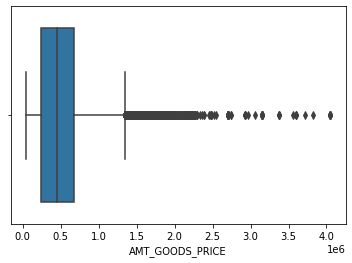

REGION_POPULATION_RELATIVE


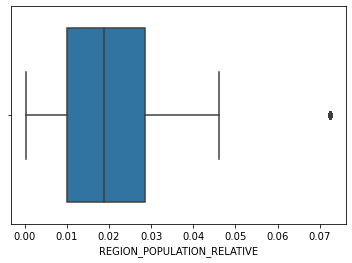

EXT_SOURCE_2


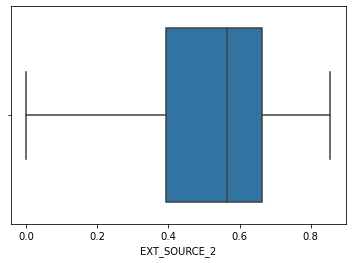

EXT_SOURCE_3


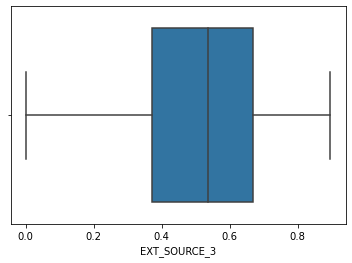

In [74]:
for i in continous_data:
    print(i)
    sns.boxplot(master_df[i])
    plt.show()

## Handling of Outlier

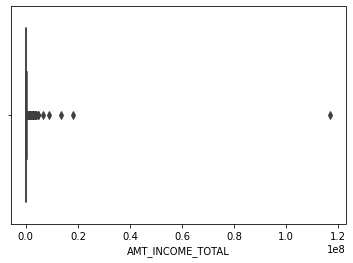

In [75]:
sns.boxplot(master_df['AMT_INCOME_TOTAL'])
plt.show()

In [76]:
master_df['AMT_INCOME_TOTAL'].describe()

count    3.074980e+05
mean     1.687974e+05
std      2.371277e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.470735e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

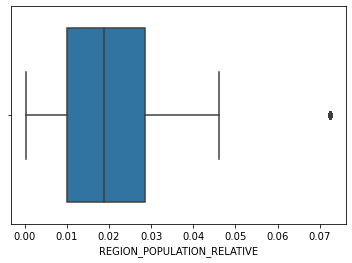

In [77]:
sns.boxplot(master_df['REGION_POPULATION_RELATIVE'])
plt.show()

In [78]:
master_df['REGION_POPULATION_RELATIVE'].describe()

count    307498.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [79]:
master_df['REGION_POPULATION_RELATIVE'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.018850
0.70    0.025164
0.90    0.035792
0.95    0.046220
0.99    0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

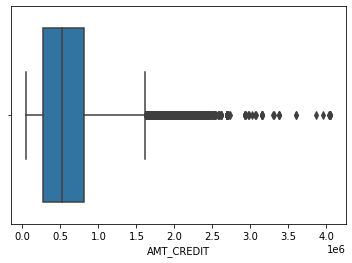

In [80]:
sns.boxplot(master_df['AMT_CREDIT'])
plt.show()

In [81]:
master_df['AMT_CREDIT'].describe()

count    3.074980e+05
mean     5.990283e+05
std      4.024929e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

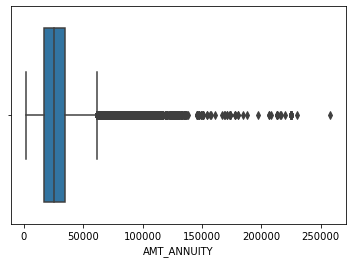

In [82]:
sns.boxplot(master_df['AMT_ANNUITY'])
plt.show()

In [83]:
master_df['AMT_ANNUITY'].describe()

count    307498.000000
mean      27108.577804
std       14493.760721
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [84]:
master_df['AMT_ANNUITY'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    24903.0
0.70    32004.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

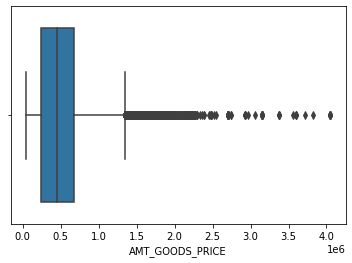

In [85]:
sns.boxplot(master_df['AMT_GOODS_PRICE'])
plt.show()

In [86]:
master_df['AMT_GOODS_PRICE'].describe()

count    3.074980e+05
mean     5.383184e+05
std      3.692911e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [87]:
master_df['AMT_GOODS_PRICE'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     450000.0
0.70     675000.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

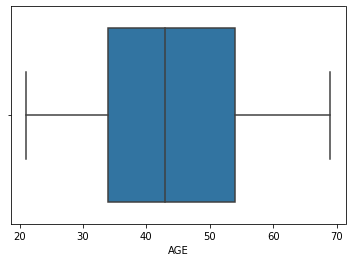

In [88]:
sns.boxplot(master_df['AGE'])
plt.show()

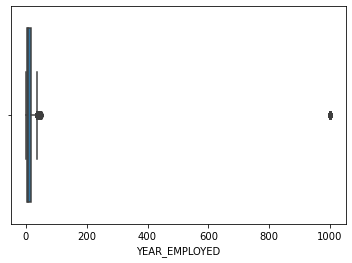

In [89]:
sns.boxplot(master_df['YEAR_EMPLOYED'])
plt.show()

In [90]:
master_df['YEAR_EMPLOYED'].value_counts()

1001.0    55374
1.0       34794
2.0       30530
3.0       27720
4.0       22932
5.0       19191
6.0       15371
7.0       14077
8.0       12380
9.0        9971
0.0        9751
10.0       8297
11.0       6482
12.0       5621
13.0       4770
14.0       4500
15.0       3916
16.0       2352
17.0       2232
18.0       1914
19.0       1851
20.0       1798
21.0       1510
22.0       1401
23.0       1100
24.0        950
25.0        862
26.0        727
28.0        656
27.0        638
29.0        567
30.0        512
31.0        439
32.0        390
34.0        355
33.0        352
35.0        300
36.0        207
37.0        174
38.0        128
39.0        122
40.0         82
41.0         66
42.0         44
43.0         31
45.0         27
44.0         20
46.0          7
48.0          4
47.0          2
49.0          1
Name: YEAR_EMPLOYED, dtype: int64

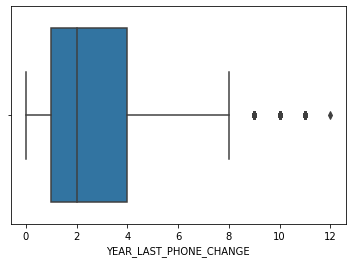

In [91]:
sns.boxplot(master_df['YEAR_LAST_PHONE_CHANGE'])
plt.show()

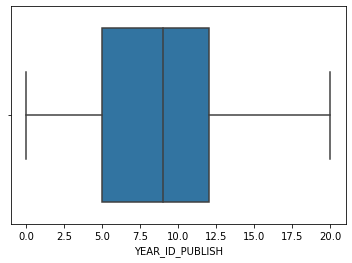

In [92]:
sns.boxplot(master_df['YEAR_ID_PUBLISH'])
plt.show()

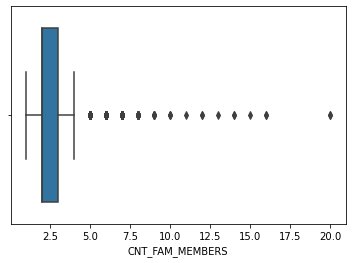

In [93]:
sns.boxplot(master_df['CNT_FAM_MEMBERS'])
plt.show()

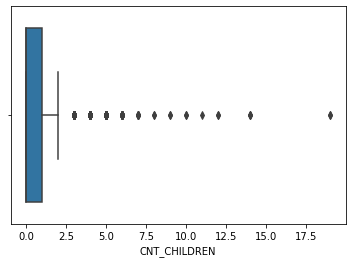

In [94]:
sns.boxplot(master_df['CNT_CHILDREN'])
plt.show()

In [95]:
master_df['CNT_CHILDREN'].describe()

count    307498.000000
mean          0.417069
std           0.722132
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

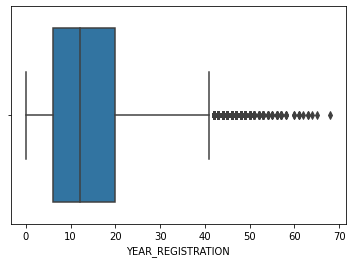

In [96]:
sns.boxplot(master_df['YEAR_REGISTRATION'])
plt.show()

## lets Do binning 

In [97]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307498 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307498 non-null  int64  
 1   TARGET                       307498 non-null  int64  
 2   NAME_CONTRACT_TYPE           307498 non-null  object 
 3   CODE_GENDER                  307498 non-null  object 
 4   FLAG_OWN_CAR                 307498 non-null  object 
 5   FLAG_OWN_REALTY              307498 non-null  object 
 6   CNT_CHILDREN                 307498 non-null  int64  
 7   AMT_INCOME_TOTAL             307498 non-null  float64
 8   AMT_CREDIT                   307498 non-null  float64
 9   AMT_ANNUITY                  307498 non-null  float64
 10  AMT_GOODS_PRICE              307498 non-null  float64
 11  NAME_TYPE_SUITE              307498 non-null  object 
 12  NAME_INCOME_TYPE             307498 non-null  object 
 13 

In [98]:
master_df['AMT_INCOME_TOTAL']=master_df['AMT_INCOME_TOTAL']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']
master_df['AMT_INCOME_RANGE']=pd.cut(master_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [99]:
master_df['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735194
200k-300k    21.210612
0-100K       20.729921
300k-400k     4.775667
400k-500k     1.744742
500k-600k     0.356369
600k-700k     0.282817
800k-900k     0.096984
700k-800k     0.052723
900k-1M       0.009113
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

In [100]:
master_df['AGE']
bins= [0, 20, 30, 40, 50, 60, 100]
slot = ['0-20', '20-30', '30-40', '40-50', '50-60', '60 above' ]
master_df['AGE GROUP']=pd.cut(master_df['AGE'],bins,labels=slot)
master_df['AGE GROUP'].value_counts(normalize=True)*100

30-40       26.916273
40-50       24.554631
50-60       22.098680
20-30       15.891160
60 above    10.539256
0-20         0.000000
Name: AGE GROUP, dtype: float64

In [101]:
master_df['AMT_ANNUITY'].describe()

count    307498.000000
mean      27108.577804
std       14493.760721
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [102]:
master_df['AMT_ANNUITY']
bins= [0, 20, 30, 40, 50, 60, 100, 200]
slot = ['0-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-100k', '100k Above']
master_df['AMT_ANNUITY RANGE']=pd.cut(master_df['AGE'],bins,labels=slot)
master_df['AMT_ANNUITY RANGE'].value_counts(normalize=True)*100

30k-40k       26.916273
40k-50k       24.554631
50k-60k       22.098680
20k-30k       15.891160
60k-100k      10.539256
0-20k          0.000000
100k Above     0.000000
Name: AMT_ANNUITY RANGE, dtype: float64

In [103]:
master_df['AMT_CREDIT']=master_df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]

slots =['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

master_df['AMT_CREDIT_RANGE']=pd.cut(master_df['AMT_CREDIT'],bins=bins,labels=slots)
master_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824506
1M Above     16.255065
500k-600k    11.132105
400k-500k    10.417954
100K-200K     9.801365
300k-400k     8.564934
600k-700k     7.820539
800k-900k     7.086875
700k-800k     6.241341
900k-1M       2.902783
0-100K        1.952533
Name: AMT_CREDIT_RANGE, dtype: float64

In [104]:
master_df['AMT_GOODS_PRICE']=master_df['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]

slots =['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']
master_df['AMT_GOODS_PRICE_RANGE']=pd.cut(master_df['AMT_CREDIT'],bins=bins,labels=slots)

In [105]:
master_df['AMT_GOODS_PRICE_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824506
1M Above     16.255065
500k-600k    11.132105
400k-500k    10.417954
100K-200K     9.801365
300k-400k     8.564934
600k-700k     7.820539
800k-900k     7.086875
700k-800k     6.241341
900k-1M       2.902783
0-100K        1.952533
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

In [106]:
master_df['YEAR_EMPLOYED']
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']
master_df['YEAR_EMPLOYED_RANGE']=pd.cut(master_df['YEAR_EMPLOYED'],bins=bins,labels=slots)
master_df['YEAR_EMPLOYED_RANGE'].value_counts(normalize=True)*100

0-5         55.768175
5-10        24.794841
10-20       14.620440
20-30        3.681516
30-40        1.051685
40-50        0.083343
50-60        0.000000
60 above     0.000000
Name: YEAR_EMPLOYED_RANGE, dtype: float64

# lets do univariate analysis

In [107]:
defaulters=master_df[master_df['TARGET']==1]
loan_repayer=master_df[master_df['TARGET']==0]

In [108]:
defaulters.shape

(24825, 53)

In [109]:
loan_repayer.shape

(282673, 53)

In [110]:
master_df.shape

(307498, 53)

In [111]:
282673+24825

307498

In [112]:
master_df['TARGET'].value_counts(normalize=True)*100

0    91.926777
1     8.073223
Name: TARGET, dtype: float64

In [113]:
len(defaulters)/len(loan_repayer)*100

8.78223247356486

<AxesSubplot:ylabel='TARGET'>

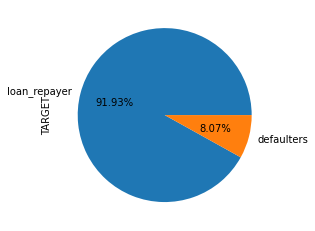

In [114]:
labels = 'loan_repayer', 'defaulters'
master_df['TARGET'].value_counts().plot.pie(autopct='%1.2f%%',labels=labels)

<function matplotlib.pyplot.show(close=None, block=None)>

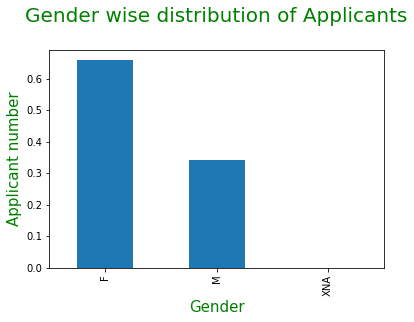

In [115]:
master_df['CODE_GENDER'].value_counts(normalize=True).plot.bar()
plt.title("Gender wise distribution of Applicants\n",fontdict = {'color':'green', 'fontsize':20, 'fontweight':10})
plt.xlabel("Gender", fontdict = {'color':'green', 'fontsize':15, 'fontweight':10})
plt.ylabel("Applicant number", fontdict = {'color':'green', 'fontsize':15, 'fontweight':10})
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

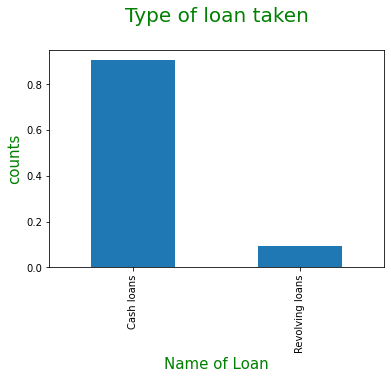

In [116]:
# lets check which loan is taken more
master_df['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.bar()
plt.title("Type of loan taken\n",fontdict = {'color':'green', 'fontsize':20, 'fontweight':10})
plt.xlabel("Name of Loan", fontdict = {'color':'green', 'fontsize':15, 'fontweight':10})
plt.ylabel("counts", fontdict = {'color':'green', 'fontsize':15, 'fontweight':10})
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

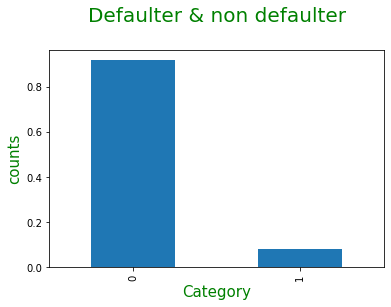

In [117]:
master_df['TARGET'].value_counts(normalize=True).plot.bar()
plt.title("Defaulter & non defaulter\n",fontdict = {'color':'green', 'fontsize':20, 'fontweight':10})
plt.xlabel("Category", fontdict = {'color':'green', 'fontsize':15, 'fontweight':10})
plt.ylabel("counts", fontdict = {'color':'green', 'fontsize':15, 'fontweight':10})
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

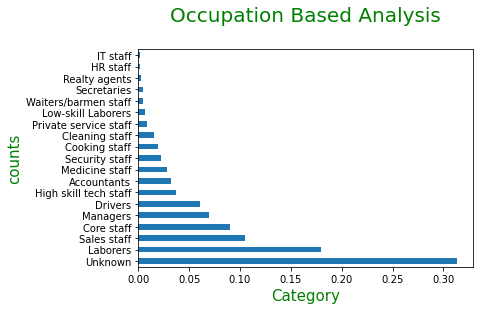

In [118]:
master_df['OCCUPATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.title("Occupation Based Analysis\n",fontdict = {'color':'green', 'fontsize':20, 'fontweight':10})
plt.xlabel("Category", fontdict = {'color':'green', 'fontsize':15, 'fontweight':10})
plt.ylabel("counts", fontdict = {'color':'green', 'fontsize':15, 'fontweight':10})
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

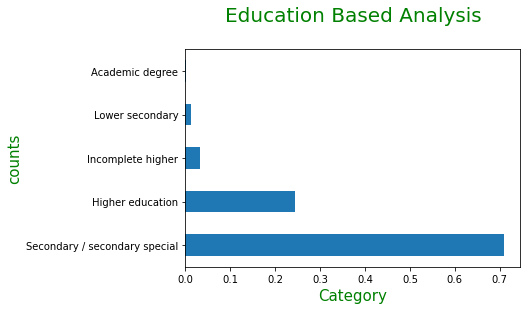

In [119]:
master_df['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.title("Education Based Analysis\n",fontdict = {'color':'green', 'fontsize':20, 'fontweight':10})
plt.xlabel("Category", fontdict = {'color':'green', 'fontsize':15, 'fontweight':10})
plt.ylabel("counts", fontdict = {'color':'green', 'fontsize':15, 'fontweight':10})
plt.show

# lets do bivariate analysis

In [120]:
master_df.groupby(['CODE_GENDER'])['TARGET'].value_counts(normalize=True)*100

CODE_GENDER  TARGET
F            0          93.000395
             1           6.999605
M            0          89.857597
             1          10.142403
XNA          0         100.000000
Name: TARGET, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

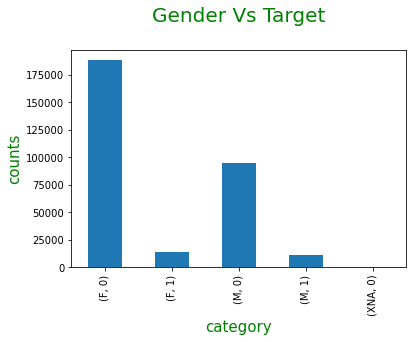

In [121]:
master_df.groupby(['CODE_GENDER'])['TARGET'].value_counts().plot.bar('color'=='g', 'r')
plt.title("Gender Vs Target\n",fontdict = {'color':'green', 'fontsize':20, 'fontweight':10})
plt.xlabel("category", fontdict = {'color':'green', 'fontsize':15, 'fontweight':10})
plt.ylabel("counts", fontdict = {'color':'green', 'fontsize':15, 'fontweight':10})
plt.show

In [122]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307498 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307498 non-null  int64   
 1   TARGET                       307498 non-null  int64   
 2   NAME_CONTRACT_TYPE           307498 non-null  object  
 3   CODE_GENDER                  307498 non-null  object  
 4   FLAG_OWN_CAR                 307498 non-null  object  
 5   FLAG_OWN_REALTY              307498 non-null  object  
 6   CNT_CHILDREN                 307498 non-null  int64   
 7   AMT_INCOME_TOTAL             307498 non-null  float64 
 8   AMT_CREDIT                   307498 non-null  float64 
 9   AMT_ANNUITY                  307498 non-null  float64 
 10  AMT_GOODS_PRICE              307498 non-null  float64 
 11  NAME_TYPE_SUITE              307498 non-null  object  
 12  NAME_INCOME_TYPE             307498 non-null

In [123]:
# lets define function to run required observation 

def analysis(feature):
    plt.figure(figsize=(12,10))
    plt.subplot(2,2,1)
    (defaulters[feature].value_counts(normalize=True)*100).plot.bar(color=['Green', 'red'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("Defaulters")

    plt.subplot(2,2,2)
    (loan_repayer[feature].value_counts(normalize=True)*100).plot.bar(color=['Blue', 'Yellow'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("loan_repayer")
    
    plt.subplot(2,2,3)
    (master_df[feature].value_counts(normalize=True)*100).plot.bar(color=['Green', 'Purple'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("distribution of customers")

    plt.subplot(2,2,4)

    per_def= master_df[[feature , 'TARGET']].groupby([feature],as_index=False).mean()
    per_def["TARGET"] = per_def["TARGET"]*100
    per_def.sort_values(by='TARGET', ascending=False, inplace=True)
    
    s = plt.bar(feature, 'TARGET',data=per_def,color=['orange', 'cyan'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("% defaulters ")
    plt.xticks(rotation=90)


    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=1.2,
                        top=1,
                        wspace=0.3,
                        hspace=0.6)
    plt.show()


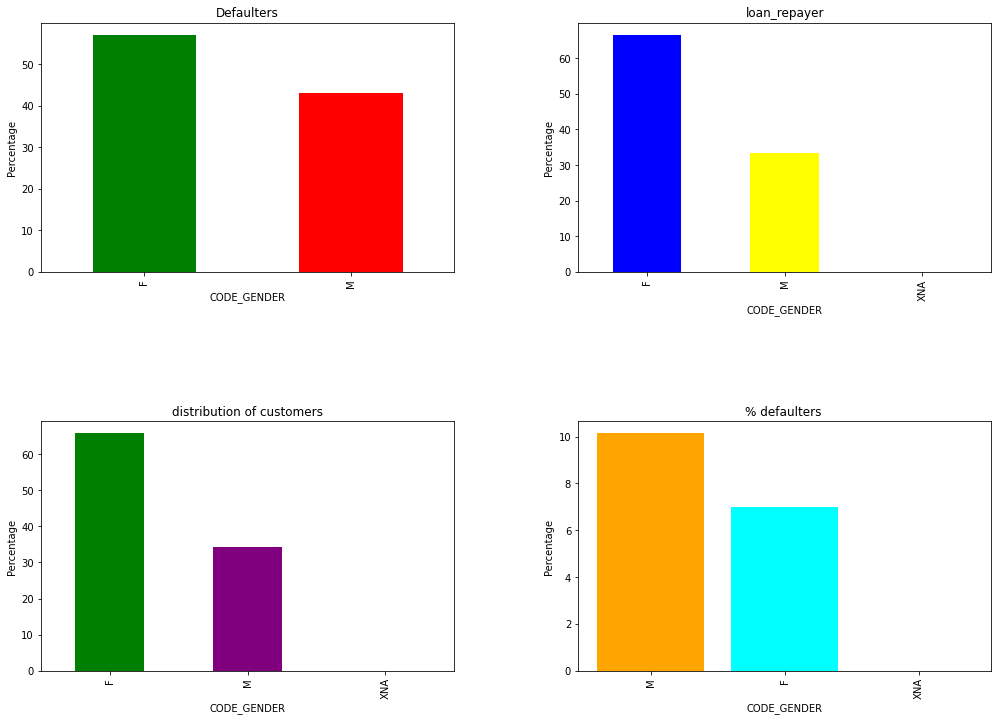

In [124]:
analysis('CODE_GENDER')

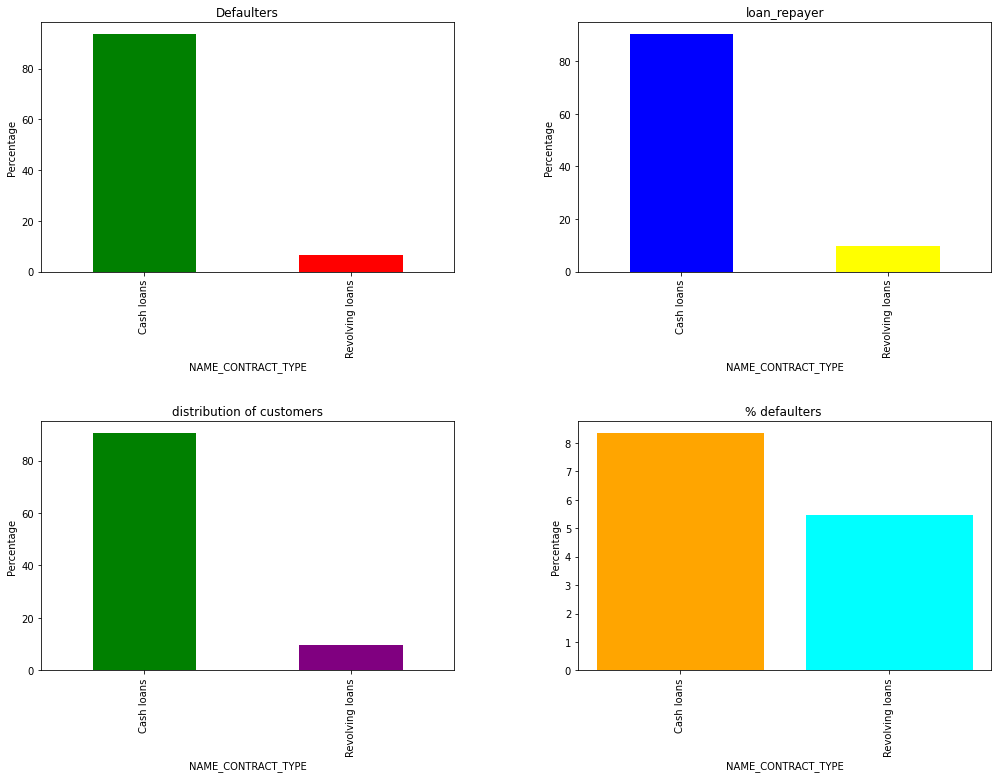

In [125]:
analysis('NAME_CONTRACT_TYPE')

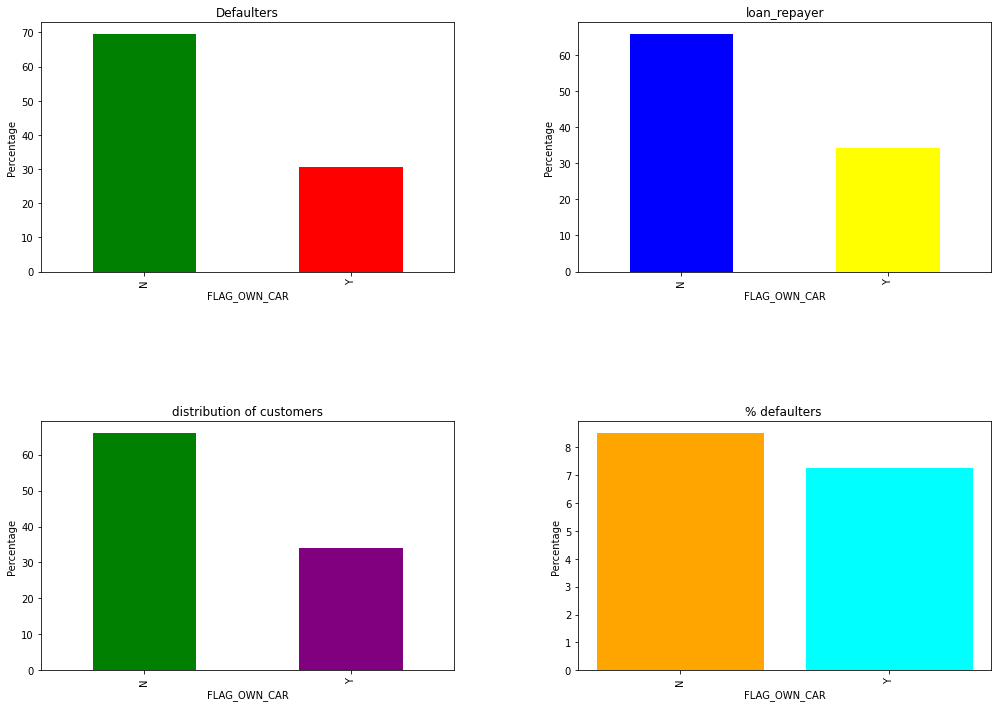

In [126]:
analysis('FLAG_OWN_CAR')

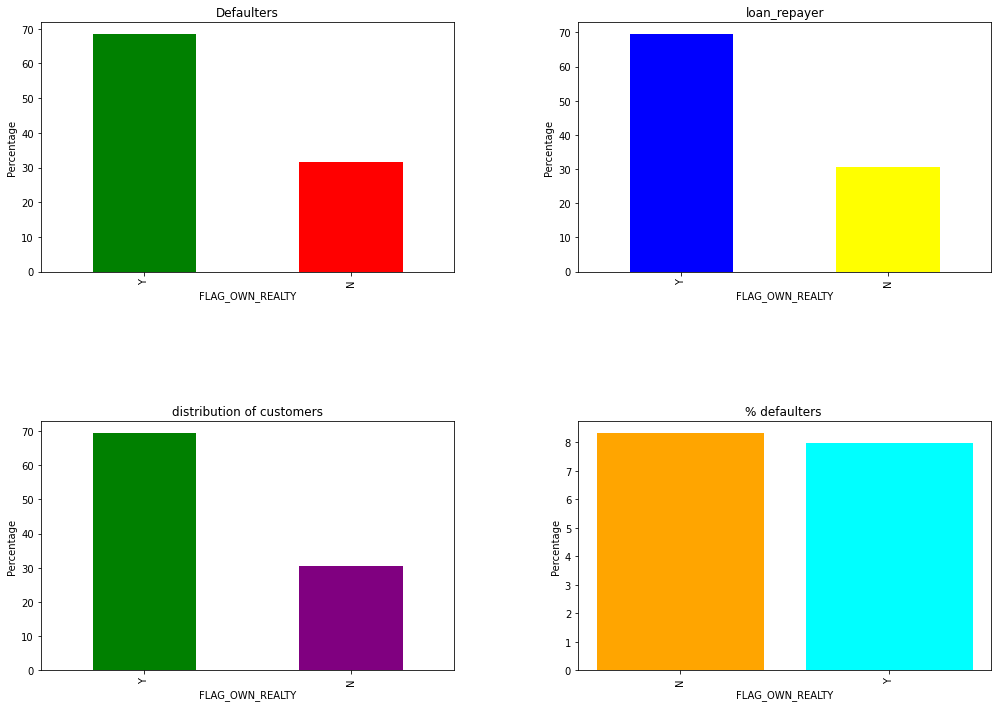

In [127]:
analysis('FLAG_OWN_REALTY')

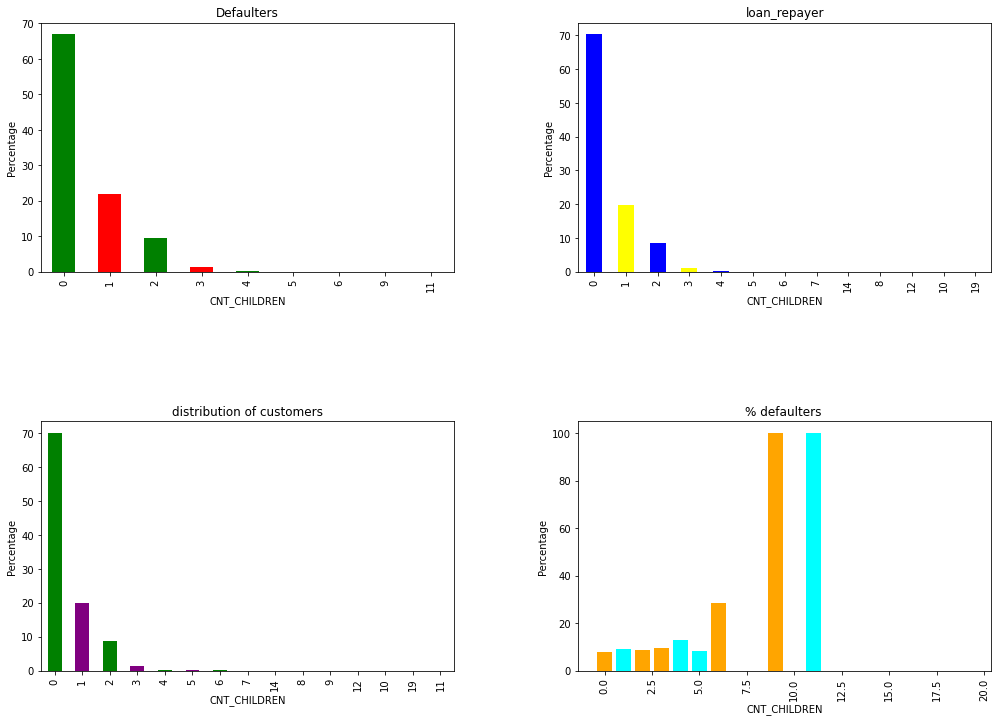

In [128]:
analysis('CNT_CHILDREN') 

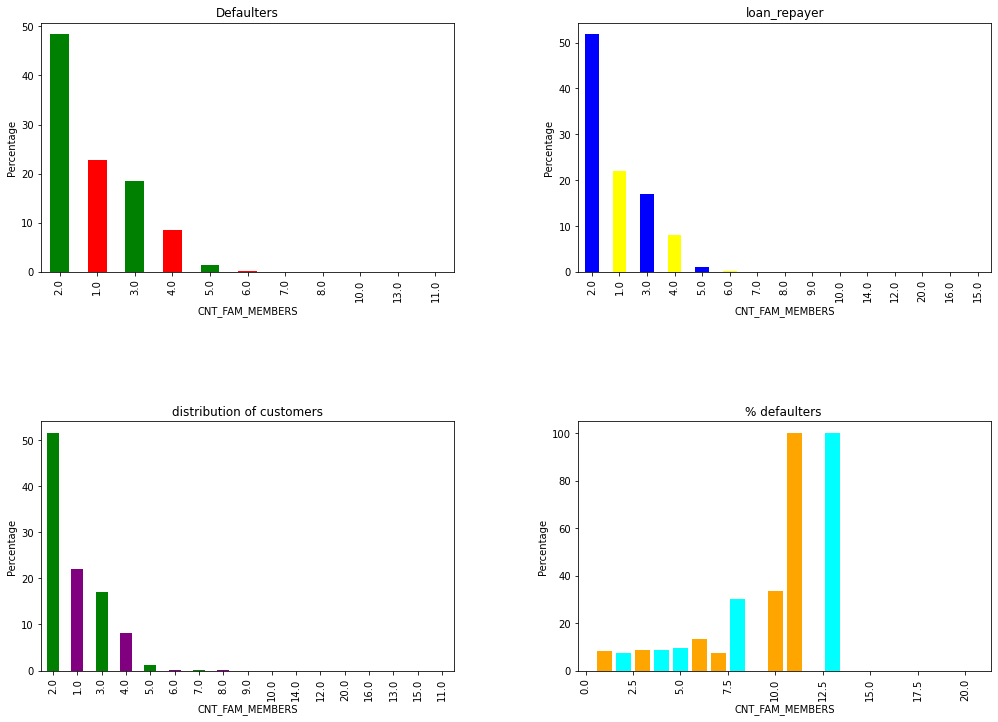

In [129]:
analysis('CNT_FAM_MEMBERS') 

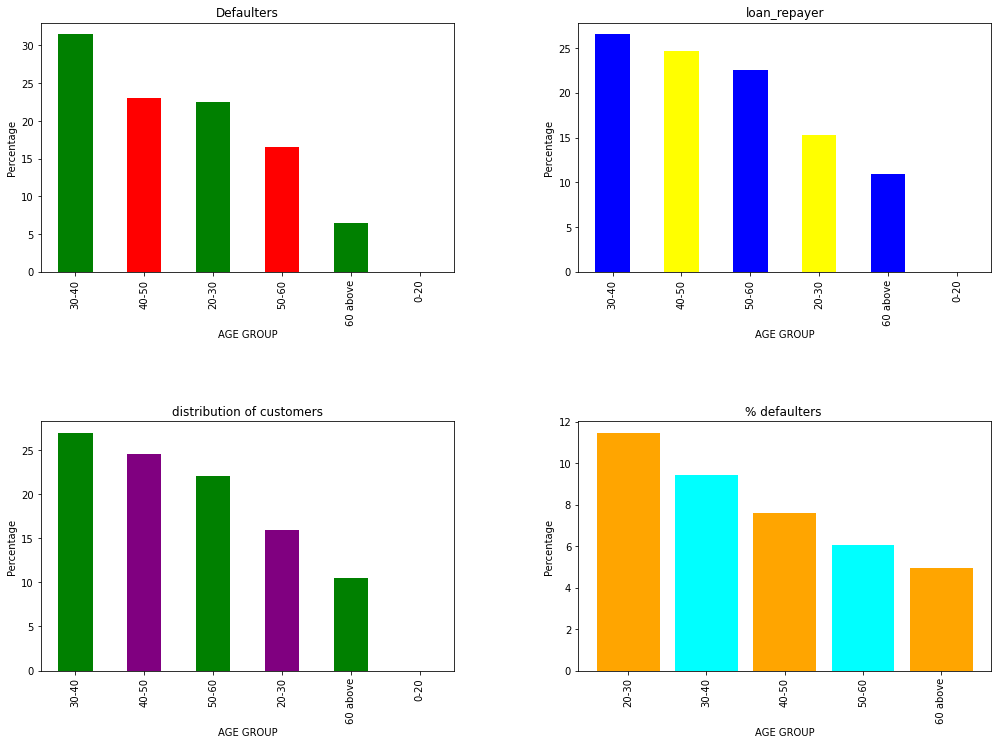

In [130]:
analysis('AGE GROUP') 

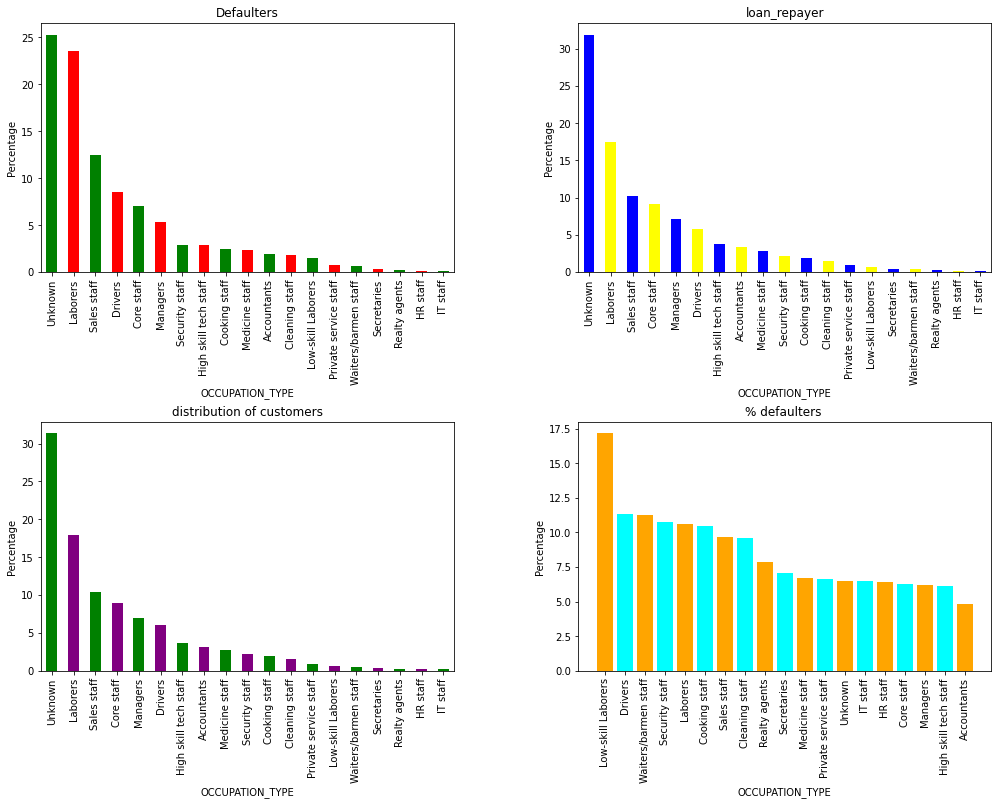

In [131]:
analysis('OCCUPATION_TYPE') 

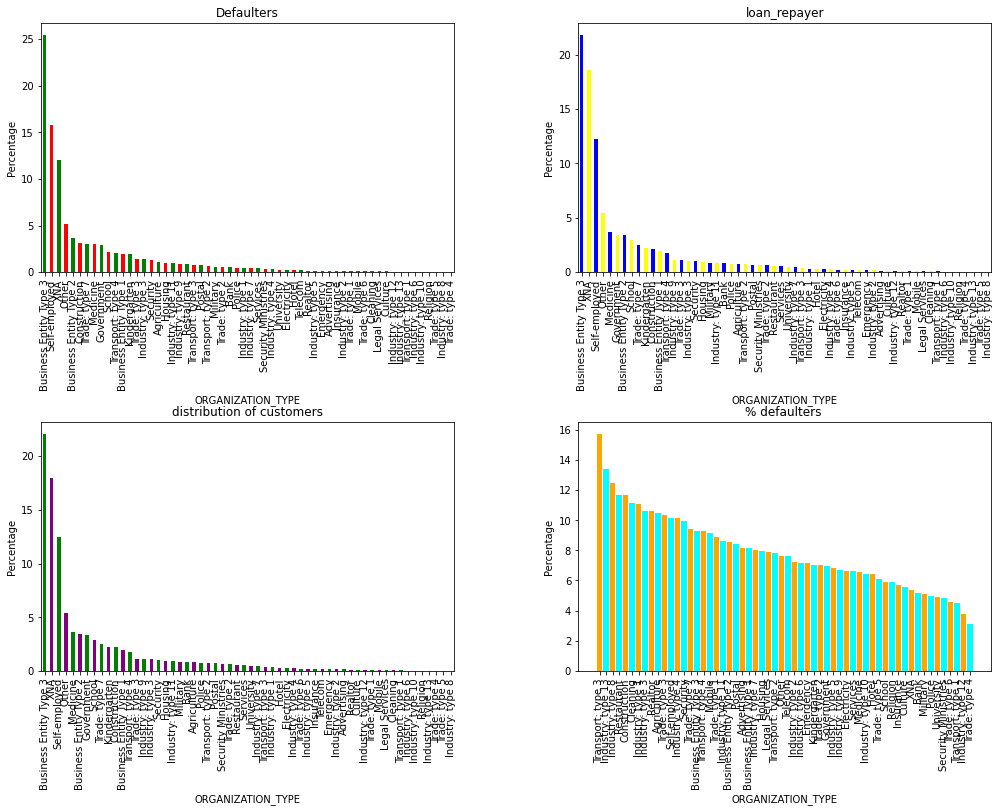

In [132]:
analysis('ORGANIZATION_TYPE') 

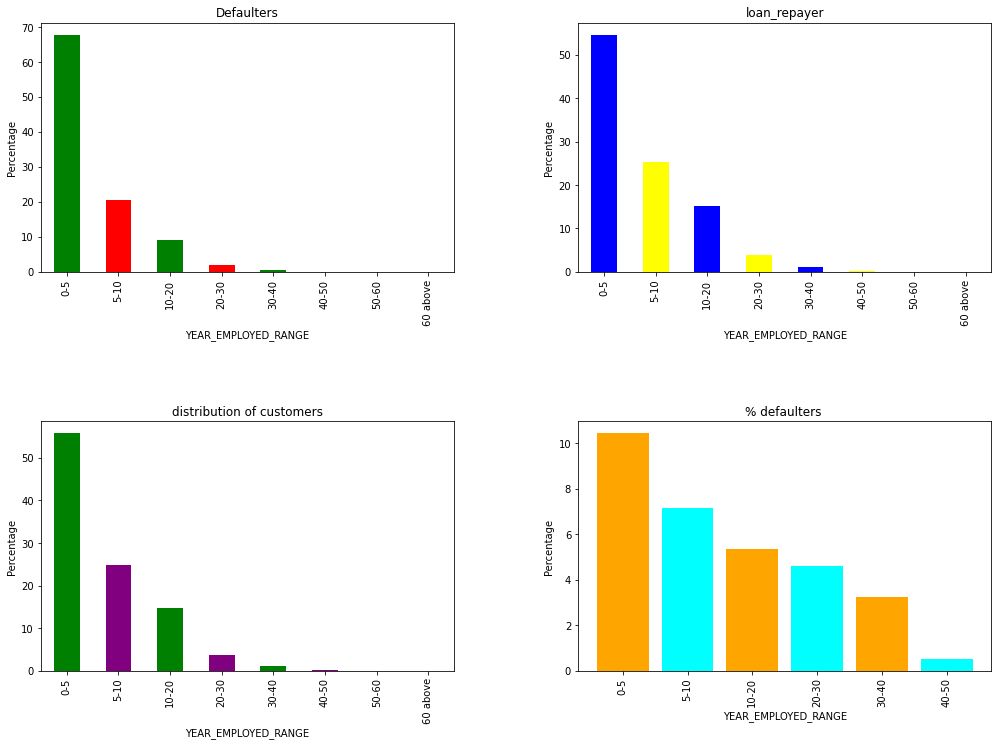

In [133]:
analysis('YEAR_EMPLOYED_RANGE') 

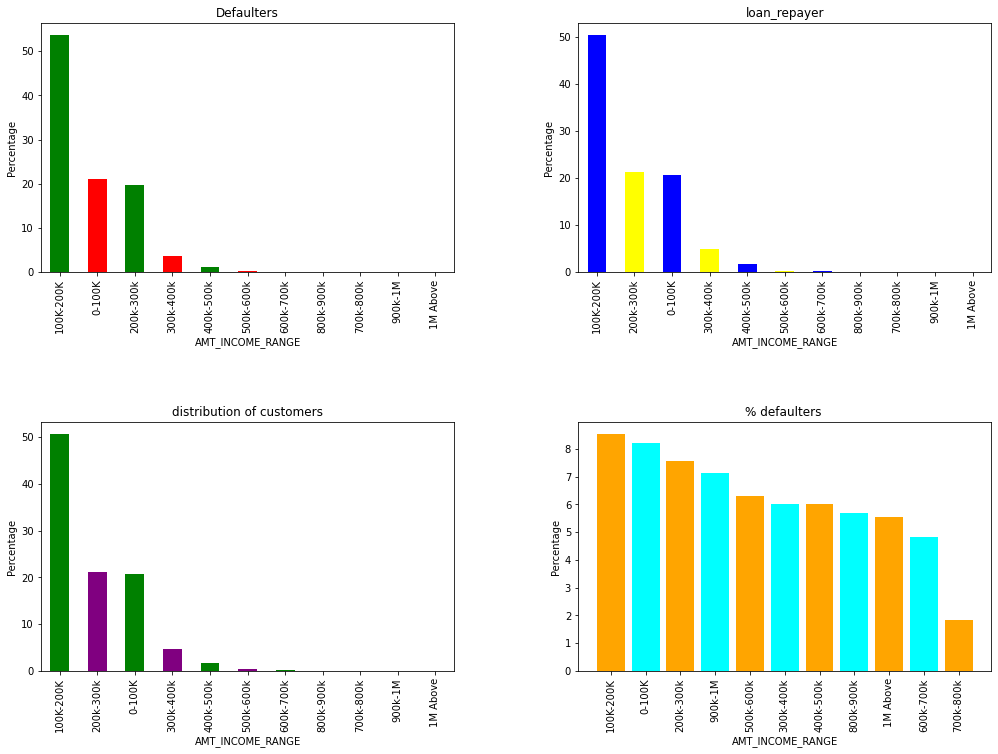

In [134]:
analysis('AMT_INCOME_RANGE') 

1.People with less income are taking more loan & having high tendency of defaulter also. 
2.In this case also no significant correlation with defaulters, as we can see defaulter rate of 6-8% found in various         income range, its mix response,  only 7 to 8 lakh income people are having least rate of defaulter than other
There is no significant correlation of income & defaulters, 

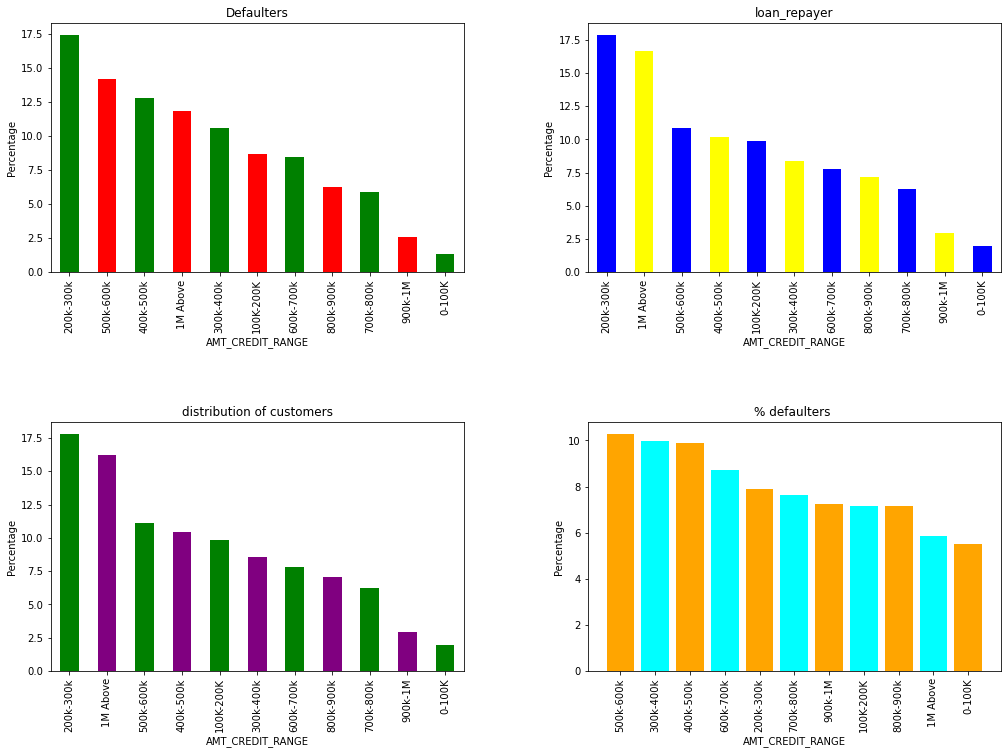

In [135]:
analysis('AMT_CREDIT_RANGE') 

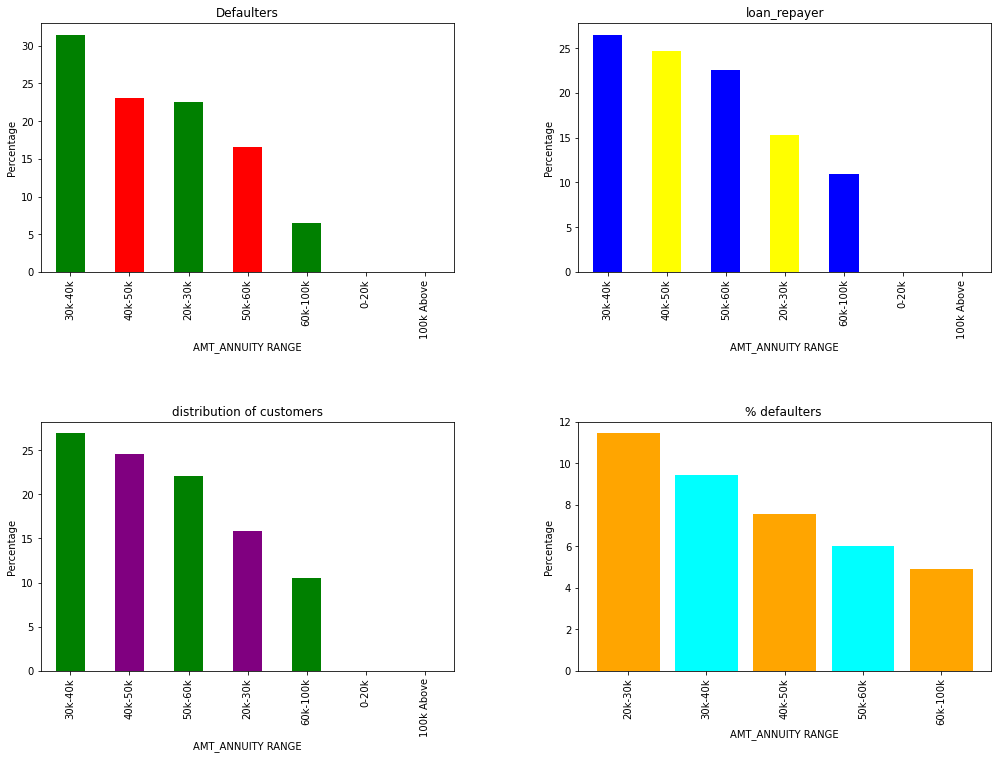

In [136]:
analysis('AMT_ANNUITY RANGE')

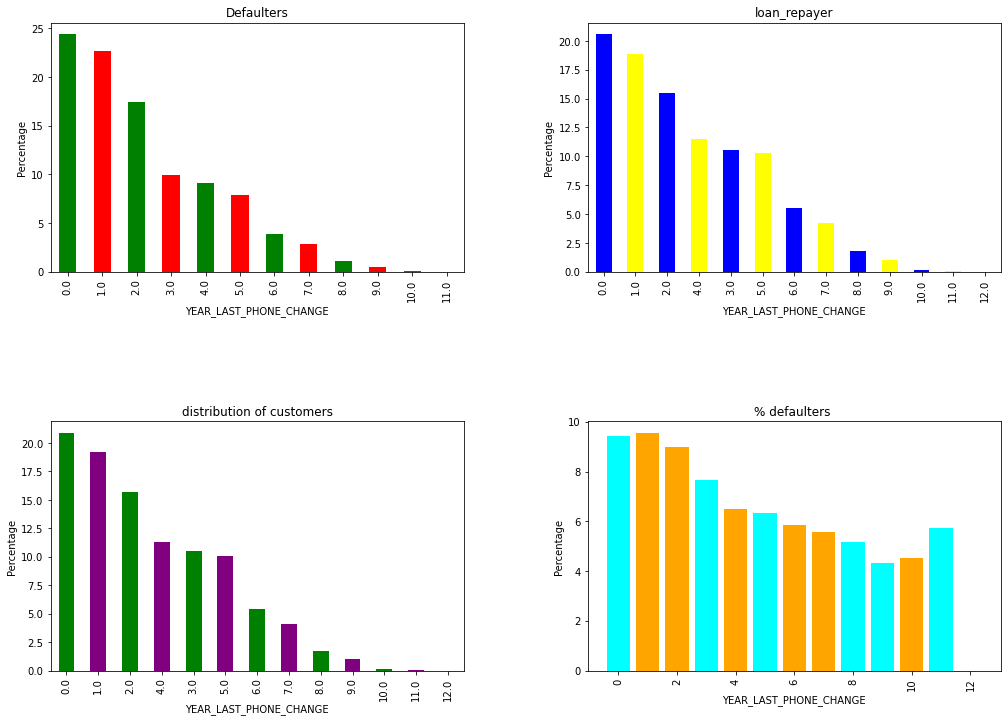

In [137]:
analysis('YEAR_LAST_PHONE_CHANGE') 

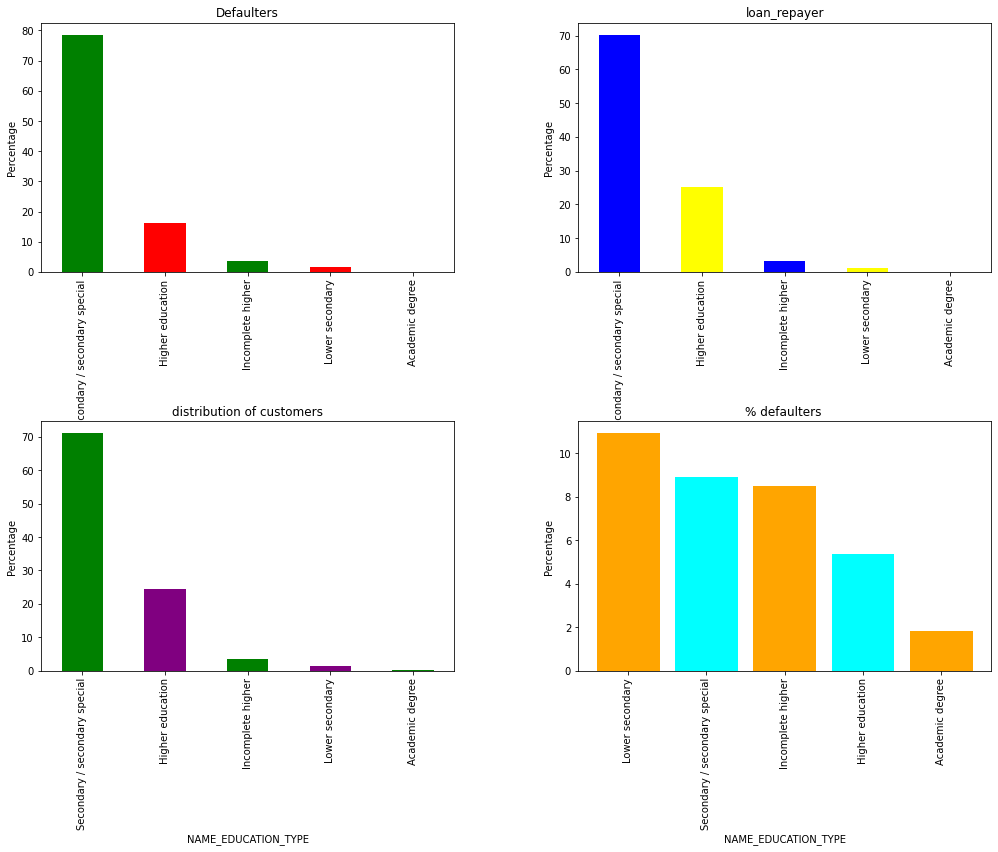

In [138]:
analysis('NAME_EDUCATION_TYPE')

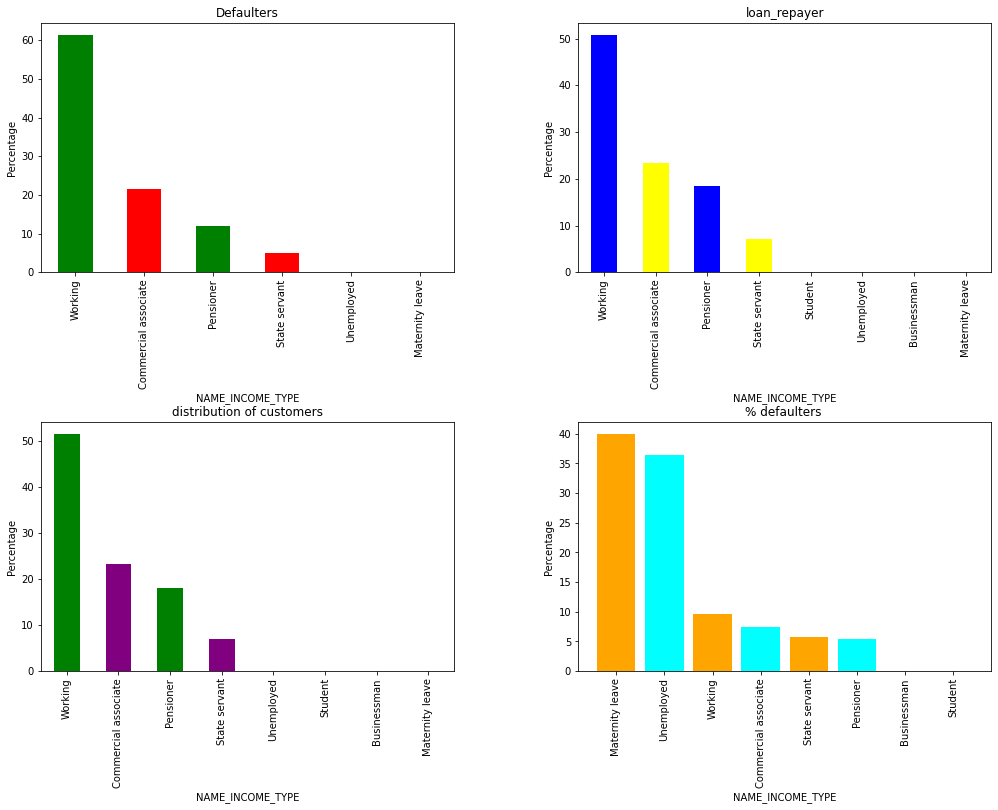

In [139]:
analysis('NAME_INCOME_TYPE')

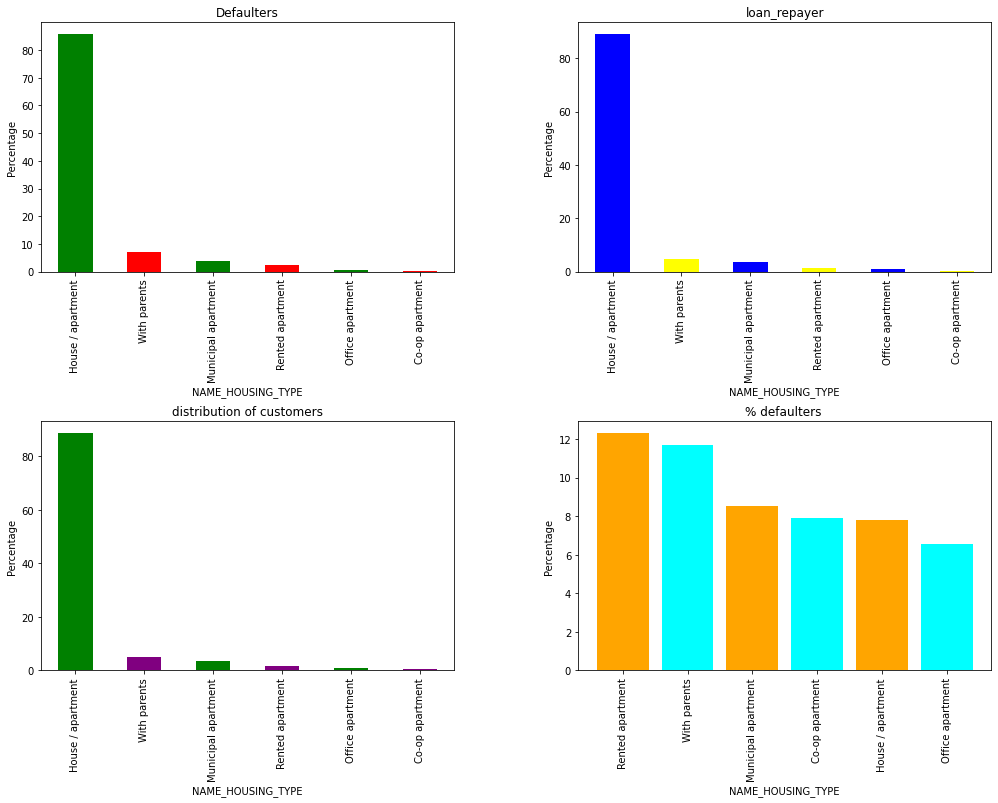

In [140]:
analysis('NAME_HOUSING_TYPE')

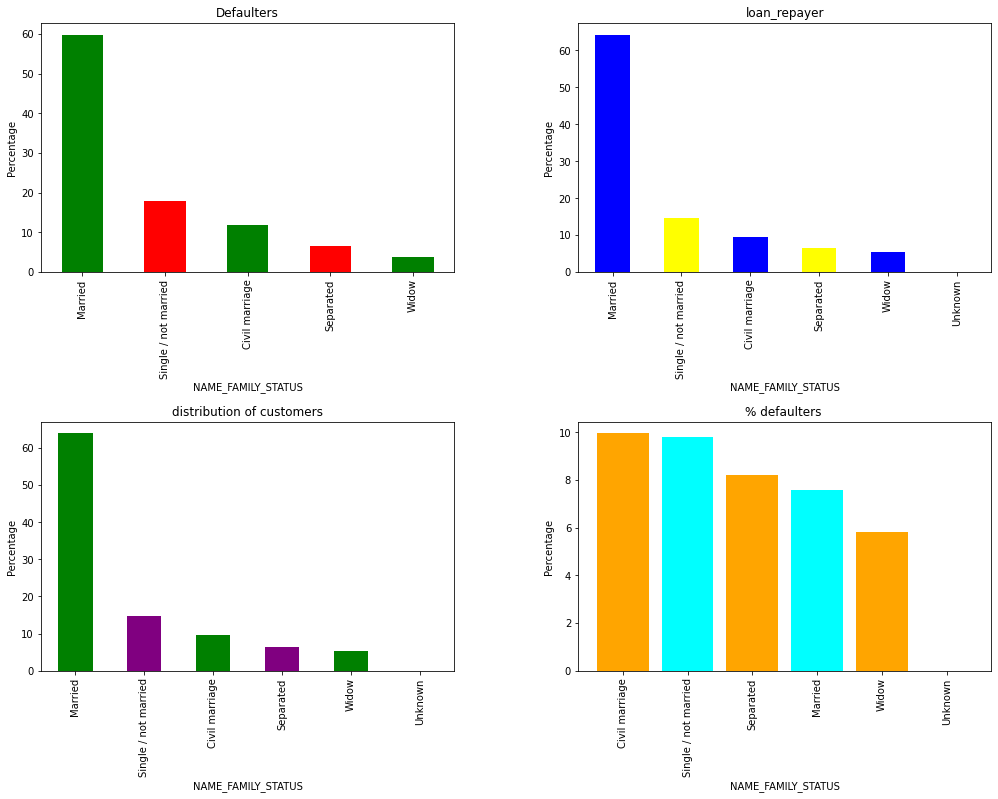

In [141]:
analysis('NAME_FAMILY_STATUS')

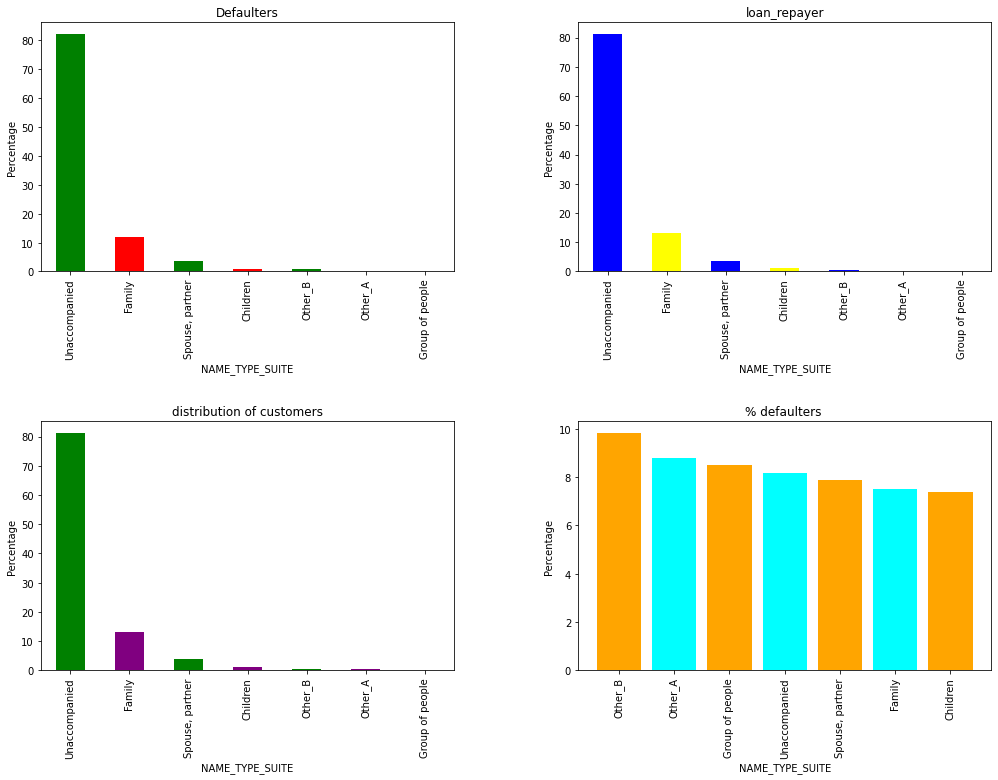

In [142]:
analysis('NAME_TYPE_SUITE')

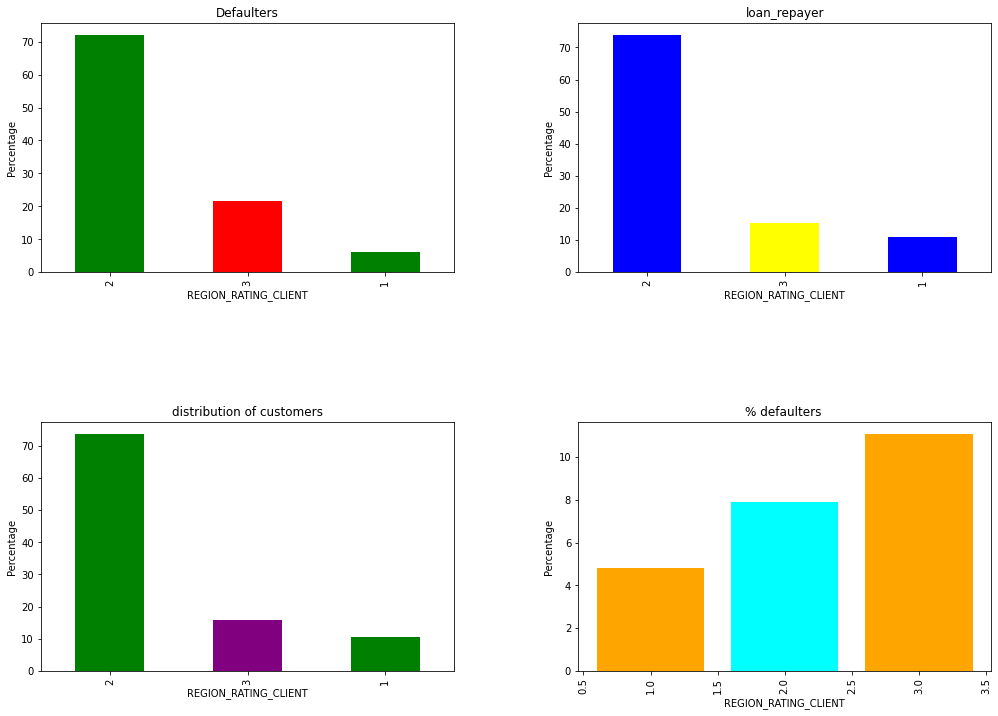

In [143]:
analysis('REGION_RATING_CLIENT')

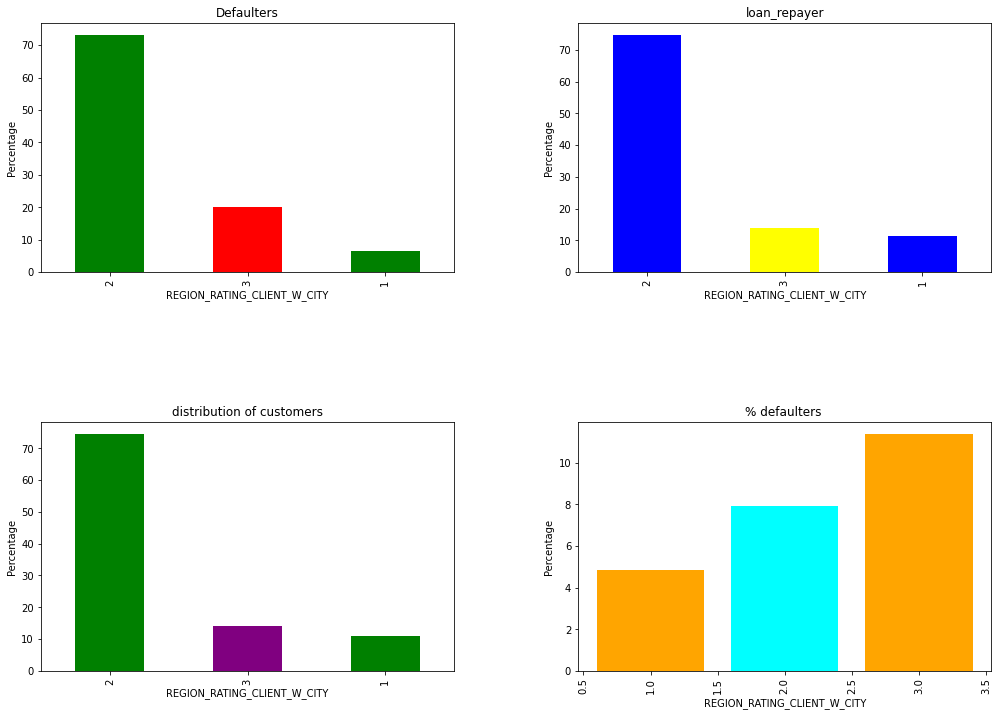

In [144]:
analysis('REGION_RATING_CLIENT_W_CITY')

### Lets see if client is not living in same region or city or at workplace how its correlated with defaulter rate

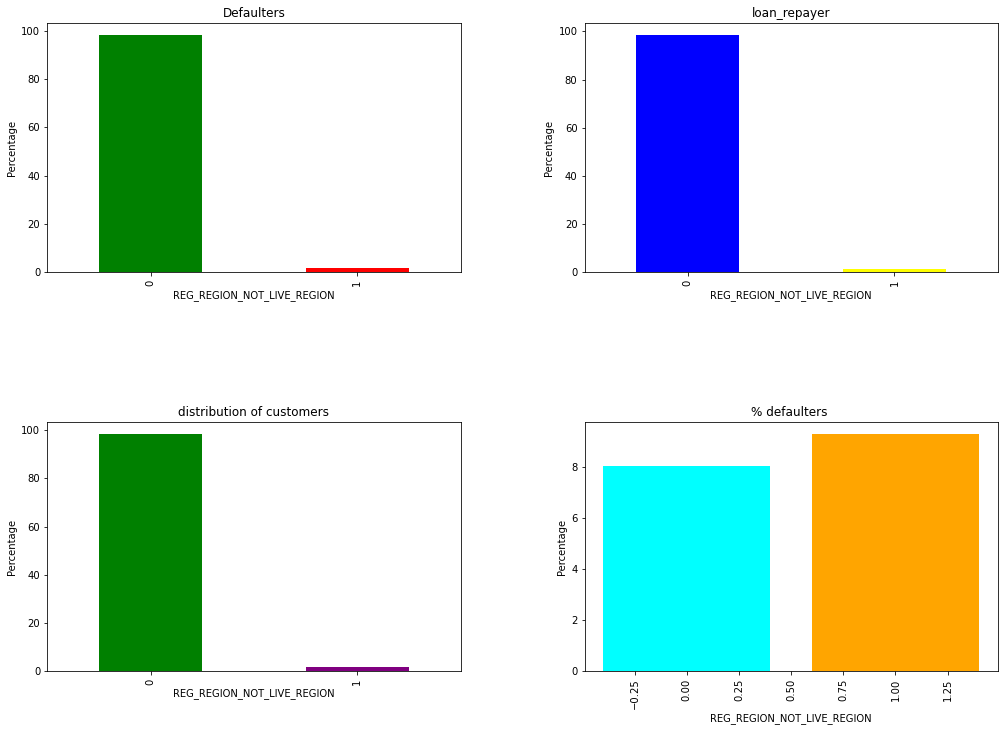

In [145]:
analysis('REG_REGION_NOT_LIVE_REGION')

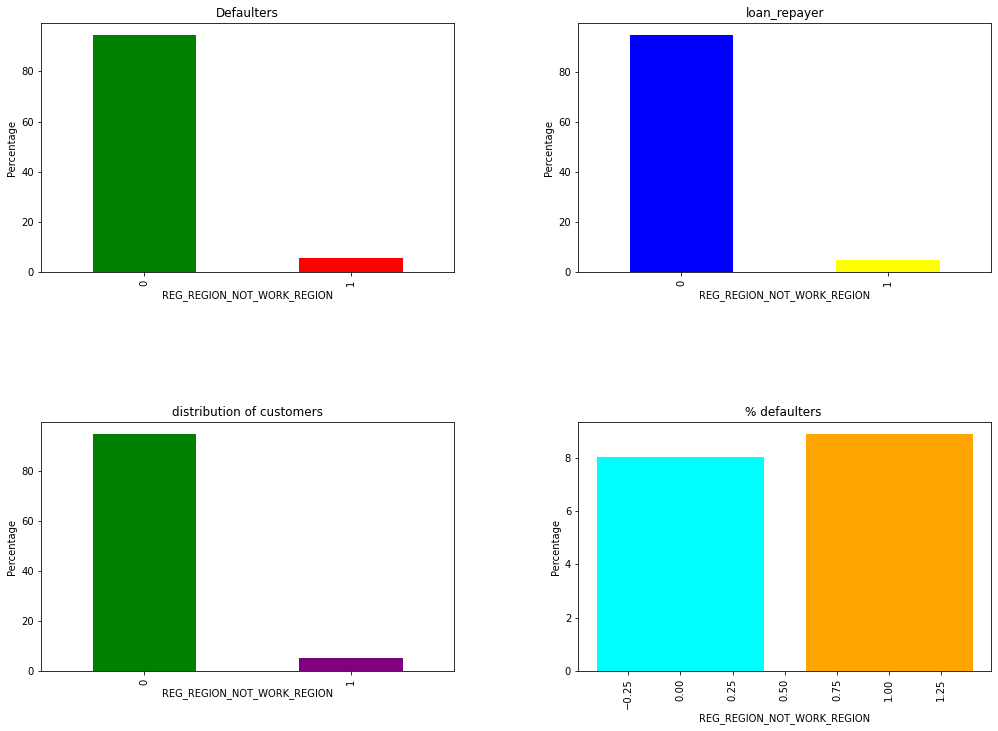

In [146]:
analysis('REG_REGION_NOT_WORK_REGION')

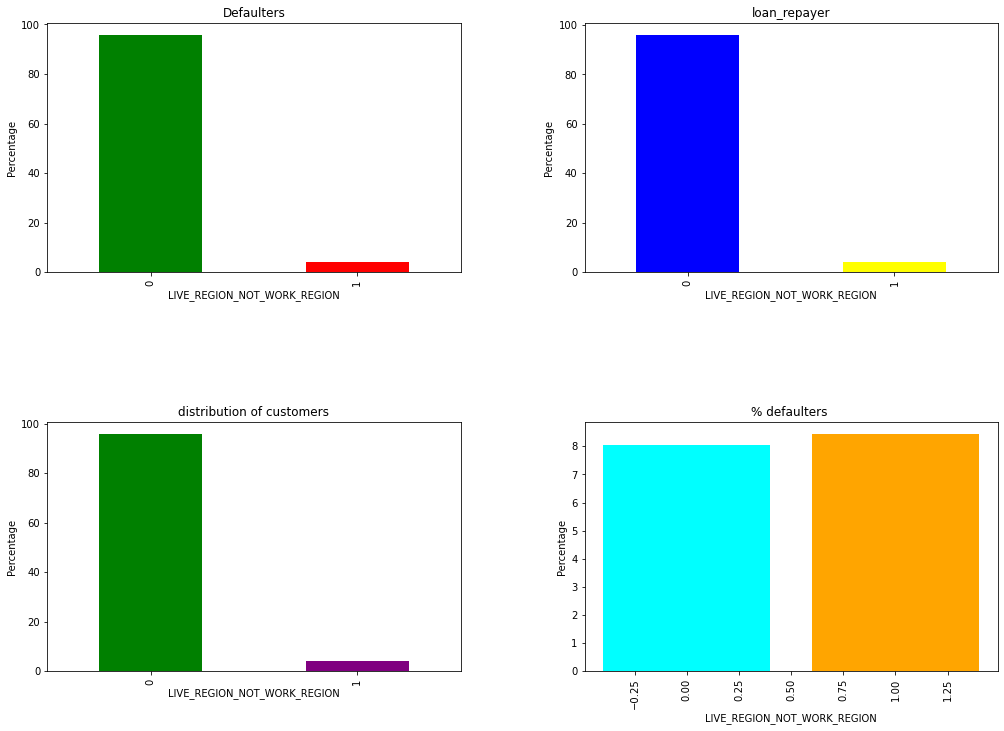

In [147]:
analysis('LIVE_REGION_NOT_WORK_REGION')

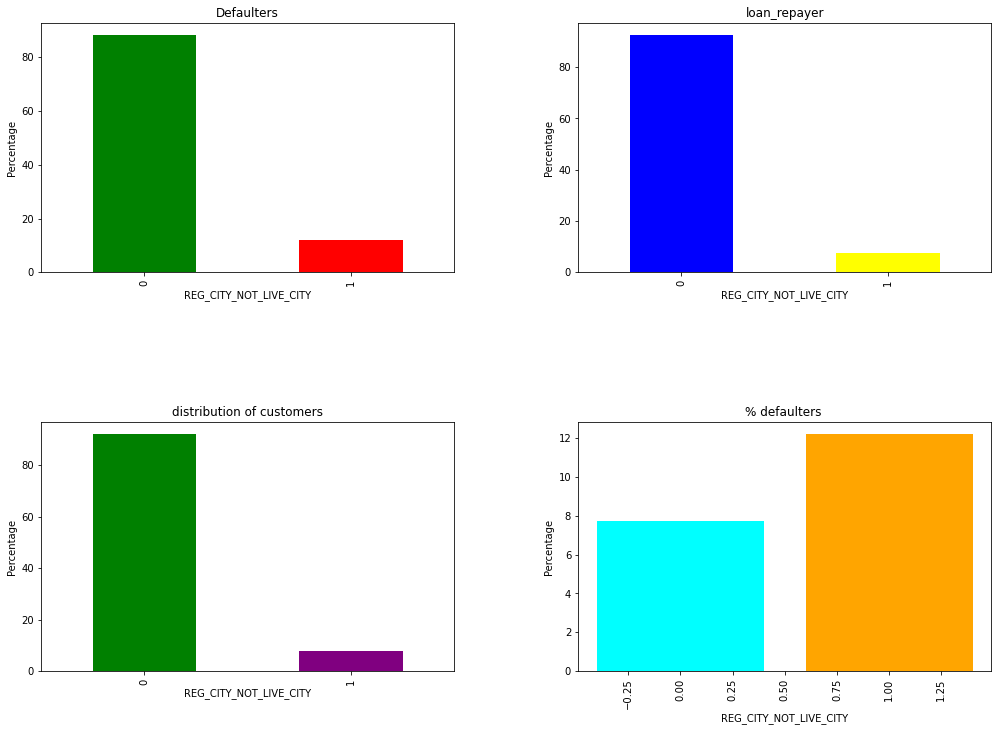

In [148]:
analysis('REG_CITY_NOT_LIVE_CITY')

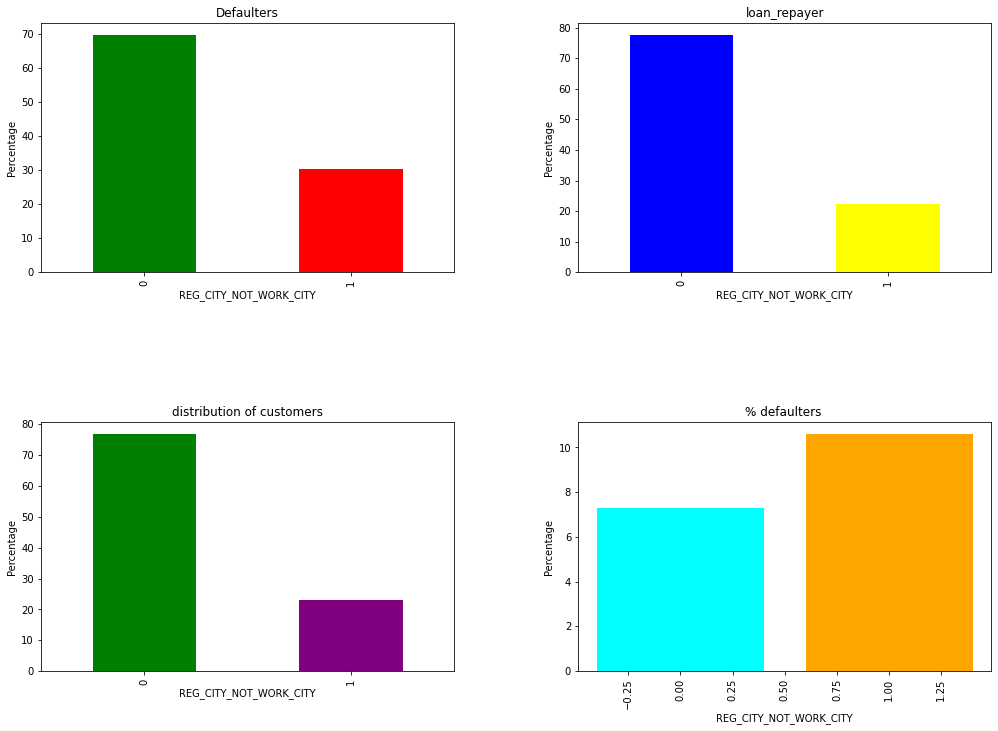

In [149]:
analysis('REG_CITY_NOT_WORK_CITY')

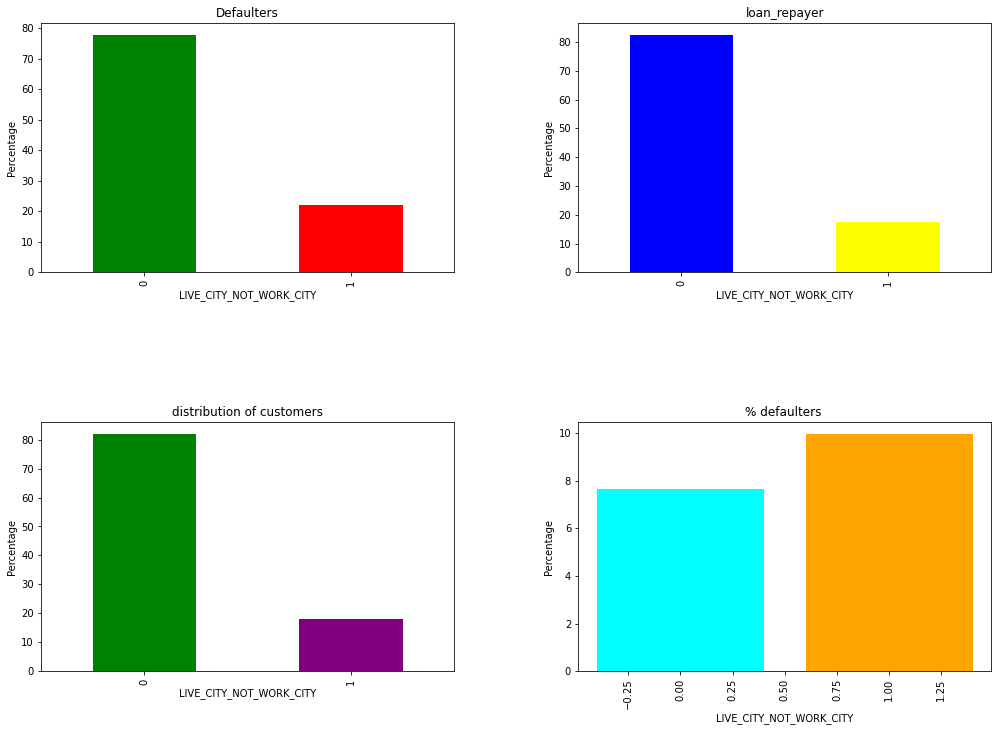

In [150]:
analysis('LIVE_CITY_NOT_WORK_CITY')

# lets find top 10 correlation 

In [151]:
master_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_R

In [152]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation= ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE',
       'YEAR_EMPLOYED', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH',
       'YEAR_LAST_PHONE_CHANGE', 'AMT_INCOME_RANGE', 'AGE GROUP',
       'AMT_CREDIT_RANGE', 'AMT_GOODS_PRICE_RANGE', 'YEAR_EMPLOYED_RANGE',
       'AMT_ANNUITY RANGE']

defaulters=master_df[master_df['TARGET']==1]
loan_repayer=master_df[master_df['TARGET']==0]


In [153]:
# Getting the top 10 correlation for the defaulter data
corr_repayer = defaulters.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

VAR1                        VAR2  Correlation
790      OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998269
214               AMT_GOODS_PRICE                  AMT_CREDIT     0.982783
359   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.956637
282               CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484
826      DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.868994
503   LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
611       LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778540
215               AMT_GOODS_PRICE                 AMT_ANNUITY     0.752295
179                   AMT_ANNUITY                  AMT_CREDIT     0.752195
1115                YEAR_EMPLOYED                         AGE     0.581765

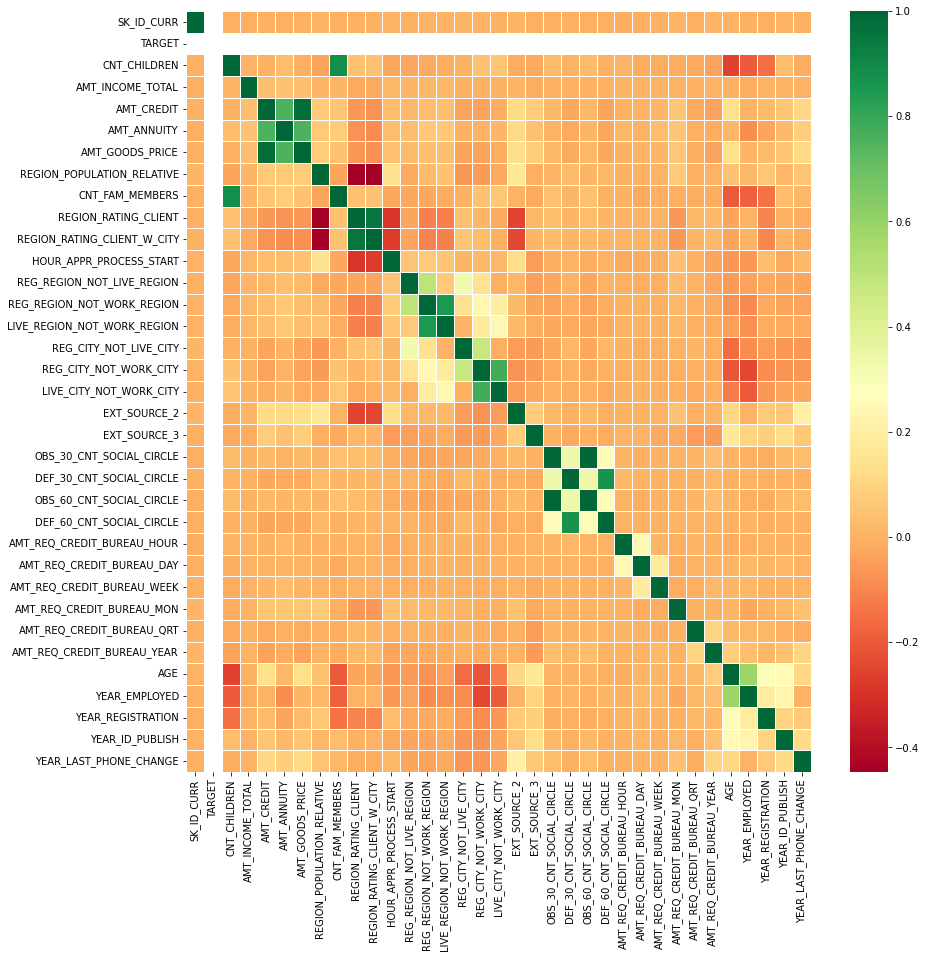

In [154]:
fig = plt.figure(figsize=(14,14))
ax = sns.heatmap(defaulters.corr(), cmap="RdYlGn",annot=False,linewidth =1)

In [155]:
# Getting the top 10 correlation for the Loan Repayer data
corr_repayer = loan_repayer.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

VAR1                        VAR2  Correlation
790      OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998508
214               AMT_GOODS_PRICE                  AMT_CREDIT     0.987022
359   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.950146
282               CNT_FAM_MEMBERS                CNT_CHILDREN     0.878574
503   LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861821
826      DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.859331
611       LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830369
215               AMT_GOODS_PRICE                 AMT_ANNUITY     0.776433
179                   AMT_ANNUITY                  AMT_CREDIT     0.771310
1115                YEAR_EMPLOYED                         AGE     0.625832

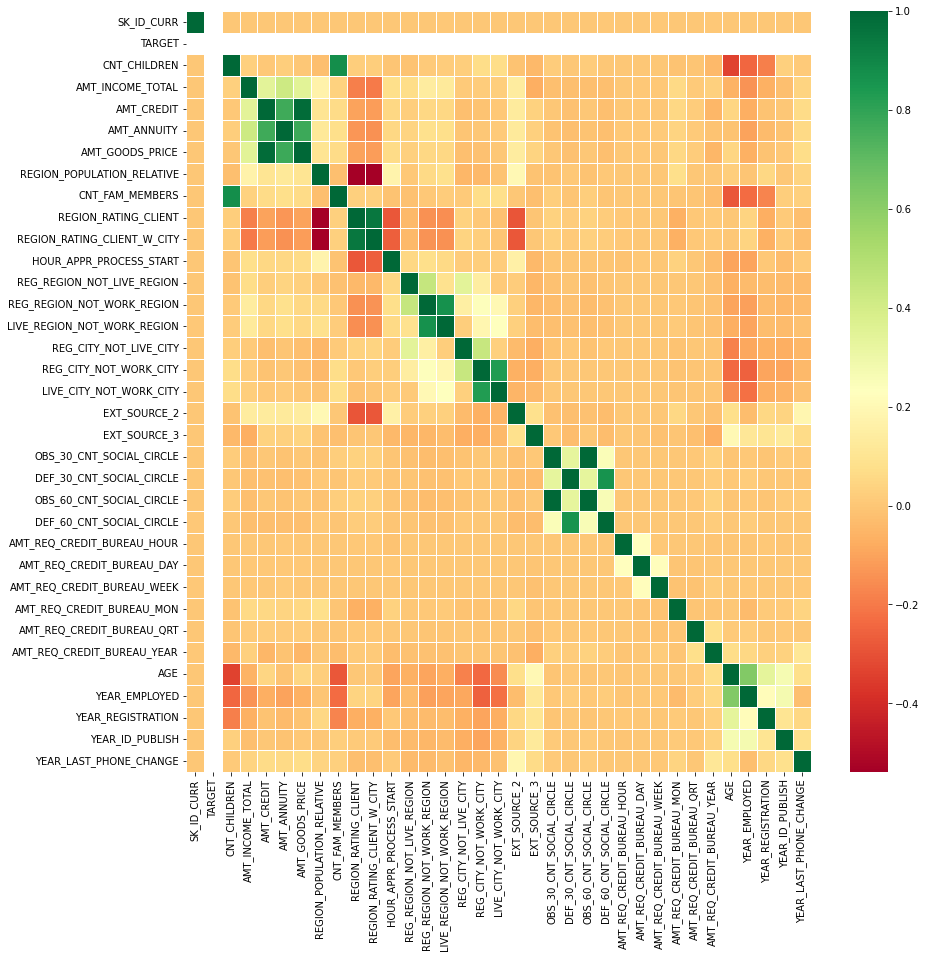

In [156]:
fig = plt.figure(figsize=(14,14))
ax = sns.heatmap(loan_repayer.corr(), cmap="RdYlGn",annot=False,linewidth =1)

# lets have look on Previous Application data 

In [157]:
df=pd.read_csv('previous_application.csv')

In [158]:
df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [159]:
df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [160]:
df.shape

(1670214, 37)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## lets do some data cleaning

In [162]:
df.isnull().sum()/df.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [163]:
df.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], inplace=True, axis=1)

In [164]:
df.isnull().sum()/df.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [165]:
df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [166]:
df['DAYS_DECISION'].head()

0    -73
1   -164
2   -301
3   -512
4   -781
Name: DAYS_DECISION, dtype: int64

In [167]:
df['YEAR_DECISION'] = df['DAYS_DECISION'].abs()/365

In [168]:
df['YEAR_DECISION'].head()

0    0.200000
1    0.449315
2    0.824658
3    1.402740
4    2.139726
Name: YEAR_DECISION, dtype: float64

In [169]:
df.CHANNEL_TYPE.head()

0               Country-wide
1             Contact center
2    Credit and cash offices
3    Credit and cash offices
4    Credit and cash offices
Name: CHANNEL_TYPE, dtype: object

In [170]:
df.CHANNEL_TYPE.value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [171]:
df.SELLERPLACE_AREA.head()

0    35
1    -1
2    -1
3    -1
4    -1
Name: SELLERPLACE_AREA, dtype: int64

In [172]:
df.NAME_YIELD_GROUP.head()

0        middle
1    low_action
2          high
3        middle
4          high
Name: NAME_YIELD_GROUP, dtype: object

In [173]:
df.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA'], axis=1, inplace=True)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [175]:
df.shape

(1670214, 22)

# Its time to merge data & do its analysis

In [176]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
merge_df = pd.merge(master_df, df, how='inner', on='SK_ID_CURR')
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0             2.025      4.065975   
1               N             0             2.700     12.935025   
2               N             0             2.700     12.935025   
3               N             0             2.700     12.935025   
4               Y             0             0.675      1.350000   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5              3.510   Unaccompanied          Working   
1        35698.5             11.295          Family    State servant   
2        35698.5             11.295          Family    State servant   
3        35698.5             11.295          Family    State servant   
4         6750.0              1.350   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801        Laborers              1.0   
1                    0.003541      Core staff              2.0   
2                    0.003541      Core staff              2.0   
3                    0.003541      Core staff              2.0   
4                    0.010032        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                        0              Government   

   EXT_SOURCE_2

### Lets take look through data structure

In [177]:
merge_df.shape

(1413608, 74)

In [178]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413608 entries, 0 to 1413607
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413608 non-null  int64   
 1   TARGET                       1413608 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413608 non-null  object  
 3   CODE_GENDER                  1413608 non-null  object  
 4   FLAG_OWN_CAR                 1413608 non-null  object  
 5   FLAG_OWN_REALTY              1413608 non-null  object  
 6   CNT_CHILDREN                 1413608 non-null  int64   
 7   AMT_INCOME_TOTAL             1413608 non-null  float64 
 8   AMT_CREDIT_x                 1413608 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1413608 non-null  float64 
 11  NAME_TYPE_SUITE              1413608 non-null  object  
 12  NAME_INCOME_TYPE            

In [179]:
merge_df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413608e+06  1.413608e+06  1.413608e+06      1.413608e+06   
mean   2.784839e+05  8.655865e-02  4.049199e-01      1.733149e+00   
std    1.028123e+05  2.811873e-01  7.173614e-01      1.985793e+00   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e-01   
25%    1.893700e+05  0.000000e+00  0.000000e+00      1.125000e+00   
50%    2.789990e+05  0.000000e+00  0.000000e+00      1.575000e+00   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+00   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+03   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.413608e+06   1.413608e+06       1.413608e+06   
mean   5.875561e+00   2.701702e+04       5.276554e+00   
std    3.849184e+00   1.395116e+04       3.531037e+00   
min    4.500000e-01   1.615500e+03       4.050000e-01   
25%    2.700000e+00   1.682100e+04       2.385000e+00   
50%    5.084955e+00   2.492550e+04       4.500000e+00   
75%    8.079840e+00   3.454200e+04       6.795000e+00   
max    4.050000e+01   2.250000e+05       4.050000e+01   

       REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count                1.413608e+06     1.413608e+06          1.413608e+06   
mean                 2.074907e-02     2.150540e+00          2.059659e+00   
std                  1.334658e-02     9.006871e-01          4.957766e-01   
min                  2.900000e-04     1.000000e+00          1.000000e+00   
25%                  1.003200e-02     2.000000e+00          2.000000e+00   
50%                  1.885000e-02     2.000000e+00          2.000000e+00   
75%                  2.866300e-02     3.000000e+00          2.000000e+00   
max                  7.250800e-02     2.000000e+01          3.000000e+00   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                 1.413608e+06             1.413608e+06   
mean                  2.037622e+00             1.198421e+01   
std                   4.886404e-01             3.232231e+00   
min                   1.000000e+00             0.000000e+00   
25%                   2.000000e+00             1.000000e+01   
50%                   2.000000e+00             1.200000e+01   
75%                   2.000000e+00             1.400000e+01   
max                   3.000000e+00             2.300000e+01   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                1.413608e+06                1.413608e+06   
mean                 1.207336e-02                4.395349e-02   
std                  1.092136e-01                2.049917e-01   
min                  0.000000e+00                0.000000e+00   
25%                  0.000000e+00                0.000000e+00   
50%                  0.000000e+00                0.000000e+00   
75%                  0.000000e+00                0.000000e+00   
max                  1.000000e+00                1.000000e+00   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                 1.413608e+06            1.413608e+06   
mean                  3.603403e-02            7.360032e-02   
std                   1.863749e-01            2.611194e-01   
min                   0.000000e+00            0.000000e+00   
25%                   0.000000e+00            0.000000e+00   
50%                   0.000000e+00            0.000000e+00   
75%                   0.000000e+00            0.000000e+00   
max                   1.000000e+00            1.000000e+00   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
count            1.413608e+06             1.413608e+06  1.411787e+06   
mean             2.221429e-01             1.740518e-01  5.114225e-01   
std              4.156869e-01             3.791541e-01  1.911217e-01   
min              0.000000e+00             0.000000e+00  8.173617e-08   
25%              0.000000e+00             0.000000e+00  3.890736e-01   
50%              0.000000e+00             0

In [180]:
# Bifurcating the merge based on Target value 0 and 1 for correlation and other analysis

M0 = merge_df[merge_df['TARGET']==0] # Loan_Repayers
M1 = merge_df[merge_df['TARGET']==1] # Defaulters

In [181]:
M0.groupby(['NAME_CASH_LOAN_PURPOSE'])['TARGET'].value_counts()

NAME_CASH_LOAN_PURPOSE            TARGET
Building a house or an annex      0           2020
Business development              0            313
Buying a garage                   0            109
Buying a holiday home / land      0            408
Buying a home                     0            617
Buying a new car                  0            803
Buying a used car                 0           2151
Car repairs                       0            564
Education                         0           1194
Everyday expenses                 0           1836
Furniture                         0            575
Gasification / water supply       0            206
Hobby                             0             36
Journey                           0            931
Medicine                          0           1618
Money for a third person          0             19
Other                             0          11757
Payments on other loans           0           1321
Purchase of electronic equipment  0      

### lets define function 

In [182]:
def merge_analysis(feature):
    plt.figure(figsize=(12,10))
    plt.subplot(2,2,1)
    (M1[feature].value_counts(normalize=True)*100).plot.bar(color=['Green', 'red'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("Defaulters")

    plt.subplot(2,2,2)
    (M0[feature].value_counts(normalize=True)*100).plot.bar(color=['Blue', 'Yellow'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("loan_repayer")
    
    plt.subplot(2,2,3)
    (merge_df[feature].value_counts(normalize=True)*100).plot.bar(color=['Green', 'Purple'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("distribution of customers")

    plt.subplot(2,2,4)

    per_def= merge_df[[feature , 'TARGET']].groupby([feature],as_index=False).mean()
    per_def["TARGET"] = per_def["TARGET"]*100
    per_def.sort_values(by='TARGET', ascending=False, inplace=True)
    
    s = plt.bar(feature, 'TARGET',data=per_def,color=['orange', 'cyan'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("% defaulters ")
    plt.xticks(rotation=90)


    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=1.2,
                        top=1,
                        wspace=0.3,
                        hspace=0.6)
    plt.show()


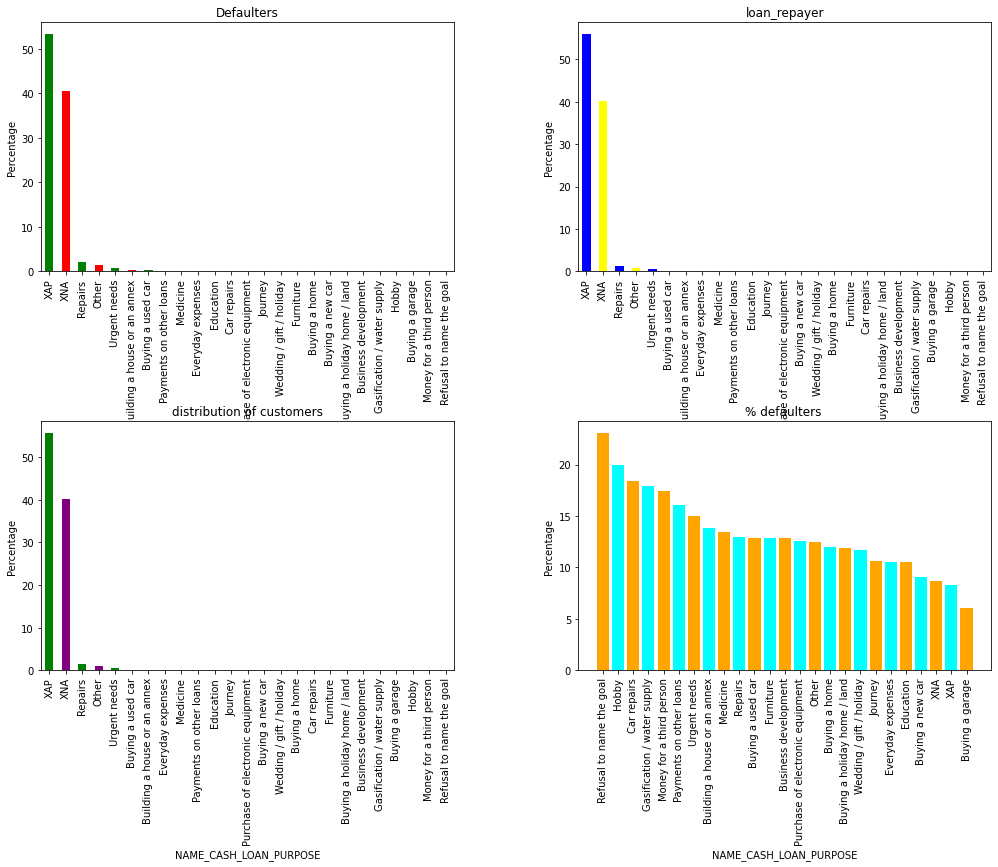

In [183]:
merge_analysis('NAME_CASH_LOAN_PURPOSE')

# Conclusion 